#MIT License
Copyright (c) 2022 Lokesh Mohan Jeswani

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# H20 AutoML Tiktok Music Popularity Prediction
Lokesh Mohan Jeswani

Abstract: The ability to foresee something's potential popularity is currently a crucial research area for all industries. It has recently grown in importance for the expanding and fiercely competitive music industry as well. Due to the widespread use of digital music platforms (such as Spotify, Billboard, and Tiktok), data may be quickly accessed and listener behavior can be easily tracked. This makes forecasting methods more convenient, and recommendation systems typically employ it as well.

This model is fed the user data, and based on the user activity, rankings and recommendations are predicted, data is further trained to provide accurate and precise results.

The below-mentioned notebook uses a variety of visualization approaches, such as the QQ plot, histogram, and box plot, to analyze the popularity of different numerical values. The study of the data shows that the model can forecast recommendations based on popularity properly, but there is still opportunity for improvement by utilizing more advanced machine learning approaches to obtain more detailed information.

Dataset Description: TikTok start to get popularity in 2019 so it can be interesting to analyze what kind of music have been promoted by this social media and noticed by users.
This dataset provides all important information that can be needed for further analyzation, starting from the basic knowledge such as track name and artist name, ending with the most advance stuff such as tempo, time_signature etc.

# Dataset Characteristics
1. Dataset consists of 223 records and has 18 features like tempo, liveliness, acousticness and speechness and various other tune characteristics.
2. Track_Popularity : Song rating based on the audience consumption of songs on the platform.
3. Dancability : Dancability describes how much the track is suitable for dance(more thumping beats) 0.0(least) - 1.0(highest).
4. Energy : Energy is again measured on the scale of 0.0 to 0.1 and represents the measure of energy in track(eg. fast and noisy).
5. loudness : the overall loudness of a track in decibels(-60 to 0 is the scale in detect the pitch of the tune).
6. Speechiness : speechiness indicated the vocal talk show (for eg: podcasts on streaming services) [Scale 0.33 to 0.66] - 0.33 is more likely music and no speech, less speech will indicate more intrumentalness and vice versa.
7. Acousticness : A measure from 0.0 to 1.0 of whether the track is acoustics, represents the feature of the song(if its acoustic or melodious).
8. Instrumentalness : no presence of vocals in the tune. (0.8 measure indicated the strong indication that the track is less vocals).
9. Liveliness : Detects the presence of audience (eg. concert).
10. Valence : measuring the positivity of music on the scale of 0.0 to 1.0[high valence indicated more positivity].
11. Tempo : Tempo of the track indicated the beats per minute(BPM), more the beats , more is the pace of music.
12. Time Signature : estimate duration of track.
13. duration_ms : duration of track in milliseconds

In [140]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd   
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [141]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------
H2O_cluster_uptime:         2 hours 10 mins
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_Lokesh_fc5aqf
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.078 Gb
H2O_cluster_total_cores:    20
H2O_cluster_allowed_cores:  20
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.8 final
--------------------------  -----------------------------

In [142]:
ttdata = pd.read_csv("https://raw.githubusercontent.com/Jeswani-Lokesh/DSEM---INFO6105/main/TikTok_songs_2019.csv")


In [143]:
ttdata

track_name                 artist_name  artist_pop  \
0                 Shake It               Metro Station          53   
1         Chinese New Year                       SALES          61   
2           Baby I'm Yours                    Breakbot          57   
3               The Git Up                Blanco Brown          60   
4     Say Hey (I Love You)  Michael Franti & Spearhead          58   
..                     ...                         ...         ...   
218   Skinny Legend Anthem                  Ava Louise          32   
219          Material Girl                     Madonna          77   
220    I Wish - Radio Edit                     Skee-Lo          51   
221  Oh No I Got a Disease                   Buss Crew          11   
222                  Woahh                        Jufu          31   

                                 album  track_pop  danceability  energy  \
0                        Metro Station         68         0.618   0.955   
1                           SALES - EP         53         0.744   0.845   
2                         By Your Side         69         0.829   0.792   
3                           The Git Up          2         0.847   0.678   
4                    All Rebel Rockers          0         0.738   0.983   
..                                 ...        ...           ...     ...   
218               Skinny Legend Anthem         50         0.845   0.518   
219  Celebration (double disc version)         78         0.742   0.883   
220                             I Wish         63         0.715   0.738   
221              Oh No I Got a Disease         26         0.649   0.735   
222                              Woahh         22         0.749   0.283   

     loudness  mode  key  speechiness  acousticness  instrumentalness  \
0      -3.836     1    4       0.0798       0.00221          0.000003   
1      -7.422     0    4       0.2530       0.75900          0.232000   
2      -3.755     0    2       0.0668       0.72600          0.000006   
3      -8.635     1    9       0.1090       0.06690          0.000000   
4      -4.374     0    5       0.0855       0.03800          0.000006   
..        ...   ...  ...          ...           ...               ...   
218    -7.568     1   11       0.2990       0.07030          0.000000   
219    -3.419     1    0       0.0329       0.33300          0.000008   
220   -10.139     1    7       0.1570       0.00826          0.000000   
221    -4.365     0   10       0.7300       0.14600          0.000000   
222   -12.368     0    0       0.3280       0.61800          0.000004   

     liveness  valence    tempo  time_signature  duration_ms  
0      0.4860    0.790  150.034               4       179947  
1      0.1000    0.749   75.221               4       160000  
2      0.1220    0.758  118.050               4       215507  
3      0.2740    0.811   97.984               4       200594  
4      0.1830    0.957   92.998               4       235760  
..        ...      ...      ...             ...          ...  
218    0.1220    0.443  129.951               4       135993  
219    0.0964    0.978  136.506               4       240280  
220    0.2600    0.573   97.877               4       252307  
221    0.1240    0.845   86.704               5       134769  
222    0.0825    0.269  142.046               4       172888  

[223 rows x 18 columns]

In [144]:
ttdata["popular"]= [ 1 if i>=65 else 0 for i in ttdata.track_pop ]
ttdata["popular"].value_counts()

0    148
1     75
Name: popular, dtype: int64

In [145]:
ttdata = ttdata.drop("track_pop",axis=1)

In [146]:
ttdata_train, ttdata_test = train_test_split(ttdata, test_size=0.3, random_state=25)

In [147]:
ttdata_train=ttdata_train
ttdata_train.head()

track_name       artist_name  artist_pop  \
28   I Don't Mind (feat. Juicy J)             Usher          78   
210                       Psycho!              MASN          60   
208             GOODMORNINGTOKYO!   TOKYO’S REVENGE          59   
21                       Steppin'  Supa Dupa Humble          38   
42                       Walk Man    Tiny Meat Gang          52   

                            album  danceability  energy  loudness  mode  key  \
28   I Don't Mind (feat. Juicy J)         0.870   0.464    -8.337     1    4   
210                       Psycho!         0.868   0.365    -9.510     1    7   
208             GOODMORNINGTOKYO!         0.907   0.539    -7.782     1    4   
21                       Steppin'         0.850   0.580    -4.502     1    1   
42                       Walk Man         0.928   0.696    -4.972     0    4   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
28        0.1780      0.205000          0.000000    0.0902    0.457  112.974   
210       0.0383      0.433000          0.000000    0.2070    0.471  114.979   
208       0.3600      0.040800          0.000000    0.2530    0.664  124.918   
21        0.1040      0.000404          0.082100    0.0714    0.120  160.055   
42        0.0866      0.331000          0.000119    0.1210    0.396   94.994   

     time_signature  duration_ms  popular  
28                4       251989        1  
210               4       197217        0  
208               4       150115        1  
21                4       145253        0  
42                4       165938        0

In [148]:
ttdata_test=ttdata_test
ttdata_test.head()

track_name          artist_name  artist_pop  \
153  Back Up (feat. Big Sean)             DeJ Loaf          61   
24                     Vibin'            Kesh Kesh          27   
201               Hokus Pokus   Insane Clown Posse          63   
75   Cash Shit (feat. DaBaby)  Megan Thee Stallion          82   
193                successful        Ariana Grande          87   

                    album  danceability  energy  loudness  mode  key  \
153  #AndSeeThatsTheThing         0.816   0.535    -8.302     1    9   
24                 Vibin'         0.686   0.805    -6.816     0   11   
201     The Great Milenko         0.870   0.841    -5.084     0   11   
75                  Fever         0.921   0.635    -4.904     1    1   
193             Sweetener         0.847   0.603    -4.607     0    0   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
153       0.3380       0.14700          0.000005    0.1760    0.435   80.012   
24        0.1540       0.00478          0.000001    0.0887    0.289  130.981   
201       0.0948       0.01930          0.000077    0.3330    0.857   92.176   
75        0.4160       0.02180          0.000000    0.0946    0.549  130.028   
193       0.0397       0.10700          0.000007    0.1060    0.735  114.045   

     time_signature  duration_ms  popular  
153               4       241267        0  
24                4       154567        0  
201               4       261173        0  
75                4       192540        1  
193               4       227387        1

In [149]:
x_train = ttdata_train.drop("popular",axis=1)
x_train.head()

track_name       artist_name  artist_pop  \
28   I Don't Mind (feat. Juicy J)             Usher          78   
210                       Psycho!              MASN          60   
208             GOODMORNINGTOKYO!   TOKYO’S REVENGE          59   
21                       Steppin'  Supa Dupa Humble          38   
42                       Walk Man    Tiny Meat Gang          52   

                            album  danceability  energy  loudness  mode  key  \
28   I Don't Mind (feat. Juicy J)         0.870   0.464    -8.337     1    4   
210                       Psycho!         0.868   0.365    -9.510     1    7   
208             GOODMORNINGTOKYO!         0.907   0.539    -7.782     1    4   
21                       Steppin'         0.850   0.580    -4.502     1    1   
42                       Walk Man         0.928   0.696    -4.972     0    4   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
28        0.1780      0.205000          0.000000    0.0902    0.457  112.974   
210       0.0383      0.433000          0.000000    0.2070    0.471  114.979   
208       0.3600      0.040800          0.000000    0.2530    0.664  124.918   
21        0.1040      0.000404          0.082100    0.0714    0.120  160.055   
42        0.0866      0.331000          0.000119    0.1210    0.396   94.994   

     time_signature  duration_ms  
28                4       251989  
210               4       197217  
208               4       150115  
21                4       145253  
42                4       165938

In [150]:
x_test = ttdata_test.drop("popular",axis=1)
x_test.head()

track_name          artist_name  artist_pop  \
153  Back Up (feat. Big Sean)             DeJ Loaf          61   
24                     Vibin'            Kesh Kesh          27   
201               Hokus Pokus   Insane Clown Posse          63   
75   Cash Shit (feat. DaBaby)  Megan Thee Stallion          82   
193                successful        Ariana Grande          87   

                    album  danceability  energy  loudness  mode  key  \
153  #AndSeeThatsTheThing         0.816   0.535    -8.302     1    9   
24                 Vibin'         0.686   0.805    -6.816     0   11   
201     The Great Milenko         0.870   0.841    -5.084     0   11   
75                  Fever         0.921   0.635    -4.904     1    1   
193             Sweetener         0.847   0.603    -4.607     0    0   

     speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
153       0.3380       0.14700          0.000005    0.1760    0.435   80.012   
24        0.1540       0.00478          0.000001    0.0887    0.289  130.981   
201       0.0948       0.01930          0.000077    0.3330    0.857   92.176   
75        0.4160       0.02180          0.000000    0.0946    0.549  130.028   
193       0.0397       0.10700          0.000007    0.1060    0.735  114.045   

     time_signature  duration_ms  
153               4       241267  
24                4       154567  
201               4       261173  
75                4       192540  
193               4       227387

In [151]:
x=list(x_train.columns)
x

['track_name',
 'artist_name',
 'artist_pop',
 'album',
 'danceability',
 'energy',
 'loudness',
 'mode',
 'key',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'duration_ms']

In [152]:
y='popular'
y

'popular'

## AUTO ML

AutoML, or Automated Machine Learning, is a method of automating the machine learning process, which includes selecting the best algorithms, hyperparameters, and feature engineering. By automating much of the process, AutoML systems aim to simplify the process of creating and deploying machine learning models.

AutoML systems search for the best model using a combination of optimization algorithms, statistical methods, and machine learning techniques, tuning the model's parameters and selecting the best features to use. This can save data scientists and machine learning engineers a significant amount of time and effort, as well as make machine learning more accessible to those with less experience in the field.

AutoML can be used in a wide range of applications, including natural language processing, image recognition, and predictive analytics. Many companies are now offering AutoML platforms, which can be used by data scientists, developers, and other professionals to quickly and easily build machine learning models.

## H2O AUTO ML

H2O.ai is a popular open-source platform for developing machine learning models, and it includes an AutoML feature that can automate a large portion of the machine learning process. AutoML from H2O automates the process of creating a large number of models with various algorithms and hyperparameters, and it chooses the best model based on the specified evaluation metric.

AutoML in H2O supports a wide range of machine learning algorithms, such as linear and logistic regression, gradient boosting machines, deep learning, and others. It also provides support for data preprocessing steps such as feature engineering, missing value imputation, and outlier detection.

A user only needs to specify the target variable, training dataset, and evaluation metric to use H2O's AutoML. H2O will then train a number of models and return the model with the best performance. H2O also includes model interpretation and explainability tools that can assist data scientists and business analysts in understanding how the model makes predictions.

AutoML in H2O can be used for a variety of tasks, including fraud detection, predictive maintenance, and customer churn analysis. It can also be used in industries where predictive analytics is becoming increasingly important, such as finance, healthcare, and marketing.

In [153]:
h2o_train = h2o.H2OFrame(ttdata_train);
h2o_test = h2o.H2OFrame(ttdata_test);

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [154]:
aml = H2OAutoML(max_models=5,seed=10,verbosity="debug",nfolds=0)
aml.train(x=x, y=y, training_frame=h2o_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%

21:26:06.117: Project: AutoML_2_20230228_212606
21:26:06.117: Cross-validation disabled by user: no fold column nor nfolds > 1.
21:26:06.117: Setting stopping tolerance adaptively based on the training frame: 0.05
21:26:06.117: Build control seed: 10
21:26:06.118: Since cross-validation is disabled, and validation frame(s) were not provided, automatically split the training data into training, validation frame(s) in the ratio 90/10/0.
21:26:06.123: training frame: Frame key: AutoML_2_20230228_212606_training_Key_Frame__upload_97d214bc71f69ea2a10fc73c27eb4708.hex    cols: 18    rows: 137  chunks: 1    size: 20118  checksum: 1435987582490205614
21:26:06.125: validation frame: Frame key: AutoML_2_20230228_212606_validation_Key_Frame__upload_97d214bc71f69ea2a10fc73c27eb4708.hex    cols: 18    rows: 19  chunks: 1    size: 3877  checksum: 2304089980503579418
21:26:06.125: leaderboard frame: Frame 

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20230228_212606


GLM Model: summary
    family    link      regularization             lambda_search                                                              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------  -------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------------------------------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.2745 )  nlambda = 30, lambda.max = 23.421, lambda.min = 0.2745, lambda.1se = -1.0  14                            14                             15                      AutoML_2_20230228_212606_training_Key_Frame__upload_97d214bc71f69ea2a10fc73c27eb4708.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.15321591482364885
RMSE: 0.3914280455251627
MAE: 0.34137476139673967
RMSLE: 0.2775111024903915
Mean Residual Deviance: 0.15321591482364885
R^2: 0.29723619126953427
Null degrees of freedom: 136
Residual degrees of freedom: 122
Null deviance: 29.868613138686243
Residual deviance: 20.990580330839894
AIC: 163.78987931388528

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.1993428814590148
RMSE: 0.44647831017756595
MAE: 0.3863464146839082
RMSLE: 0.30456187174072186
Mean Residual Deviance: 0.1993428814590148
R^2: 0.1822411340147232
Null degrees of freedom: 18
Residual degrees of freedom: 4
Null deviance: 4.821141243539879
Residual deviance: 3.787514747721281
AIC: 55.277814885313575

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    deviance_test    alpha    iterations    training_rmse       training_deviance    training_mae         training_r2          validation_rmse      validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  ---------------  -------  ------------  ------------------  -------------------  -------------------  -------------------  -------------------  ---------------------  ------------------  ------------------
    2023-02-28 21:26:06  0.000 sec   1            23        15            0.211609          0.246056         0
    2023-02-28 21:26:06  0.000 sec   2            17        15            0.209493          0.243569         0
    2023-02-28 21:26:06  0.001 sec   3            12        15            0.206802          0.240451         0
    2023-02-28 21:26:06  0.001 sec   4            9         15            0.203452          0.236643         0
    2023-02-28 21:26:06  0.002 sec   5            6.6       15            0.199402          0.232157         0        5             0.3914280455251627  0.15321591482364885  0.34137476139673967  0.29723619126953427  0.44647831017756595  0.1993428814590148     0.3863464146839082  0.1822411340147232
    2023-02-28 21:26:06  0.002 sec   6            4.8       15            0.194671          0.227105         0
    2023-02-28 21:26:06  0.002 sec   7            3.5       15            0.189359          0.221709         0
    2023-02-28 21:26:06  0.003 sec   8            2.5       15            0.183662          0.216316         0
    2023-02-28 21:26:06  0.003 sec   9            1.8       15            0.17783           0.211304         0
    2023-02-28 21:26:06  0.004 sec   10           1.3       15            0.172156          0.207004         0
    2023-02-28 21:26:06  0.004 sec   11           0.98      15            0.166908          0.203672         0
    2023-02-28 21:26:06  0.004 sec   12           0.71      15            0.162305          0.201378         0
    2023-02-28 21:26:06  0.005 sec   13           0.52      15            0.15848           0.200025         0
   

- rmse: RMSE stands for Root Mean Square Error and is a popular metric for calculating the difference between predicted and actual values. It is frequently used in regression analysis and machine learning to assess the predictive model's accuracy.
- mse: MSE stands for Mean Squared Error, and it is a commonly used metric in regression analysis and machine learning to measure the difference between predicted and actual values.
- mae: Mean Absolute Error (MAE) is a commonly used metric in regression analysis and machine learning to measure the difference between predicted and actual values.
- rmsle: RMSLE stands for Root Mean Squared Logarithmic Error and is a commonly used metric for measuring the accuracy of a model's logarithmic value prediction. When the target variable has a wide range of values, it is frequently used in regression analysis and machine learning.
- mean residual deviance: MRD is a widely used metric in statistical modeling, particularly in generalized linear models (GLMs) It computes the average difference between predicted and actual values while accounting for data variability.

In [155]:
ranking = aml.leaderboard
print(ranking)

model_id                            rmse       mse       mae     rmsle    mean_residual_deviance
GLM_1_AutoML_2_20230228_212606  0.446478  0.199343  0.386346  0.304562                  0.199343
GBM_4_AutoML_2_20230228_212606  0.517167  0.267462  0.404199  0.349151                  0.267462
GBM_3_AutoML_2_20230228_212606  0.520088  0.270491  0.39779   0.355939                  0.270491
GBM_2_AutoML_2_20230228_212606  0.521235  0.271686  0.388762  0.356717                  0.271686
DRF_1_AutoML_2_20230228_212606  0.523405  0.273952  0.433083  0.358559                  0.273952
[5 rows x 6 columns]



In [156]:
predictions1 = aml.leader.predict(h2o_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                            rmse       mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------  --------  --------  --------  --------  ------------------------  ------------------  -------------------------  ------
GBM_3_AutoML_2_20230228_212606  0.380584  0.144844  0.305646  0.266709                  0.144844                 106                   0.023695  GBM
GBM_4_AutoML_2_20230228_212606  0.39339   0.154756  0.308165  0.270592                  0.154756                  86                   0.02597   GBM
GBM_2_AutoML_2_20230228_212606  0.39979   0.159832  0.312624  0.274375                  0.159832                 173                   0.027929  GBM
DRF_1_AutoML_2_20230228_212606  0.417183  0.174041  0.35693   0.289803                  0.174041                 180                   0.03935   DRF
GLM_1_AutoML_2_20230228_212606  0.421145  0.177363  0.382633  0.302599                  0.177363                  23                   0.036374  GLM
[5 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

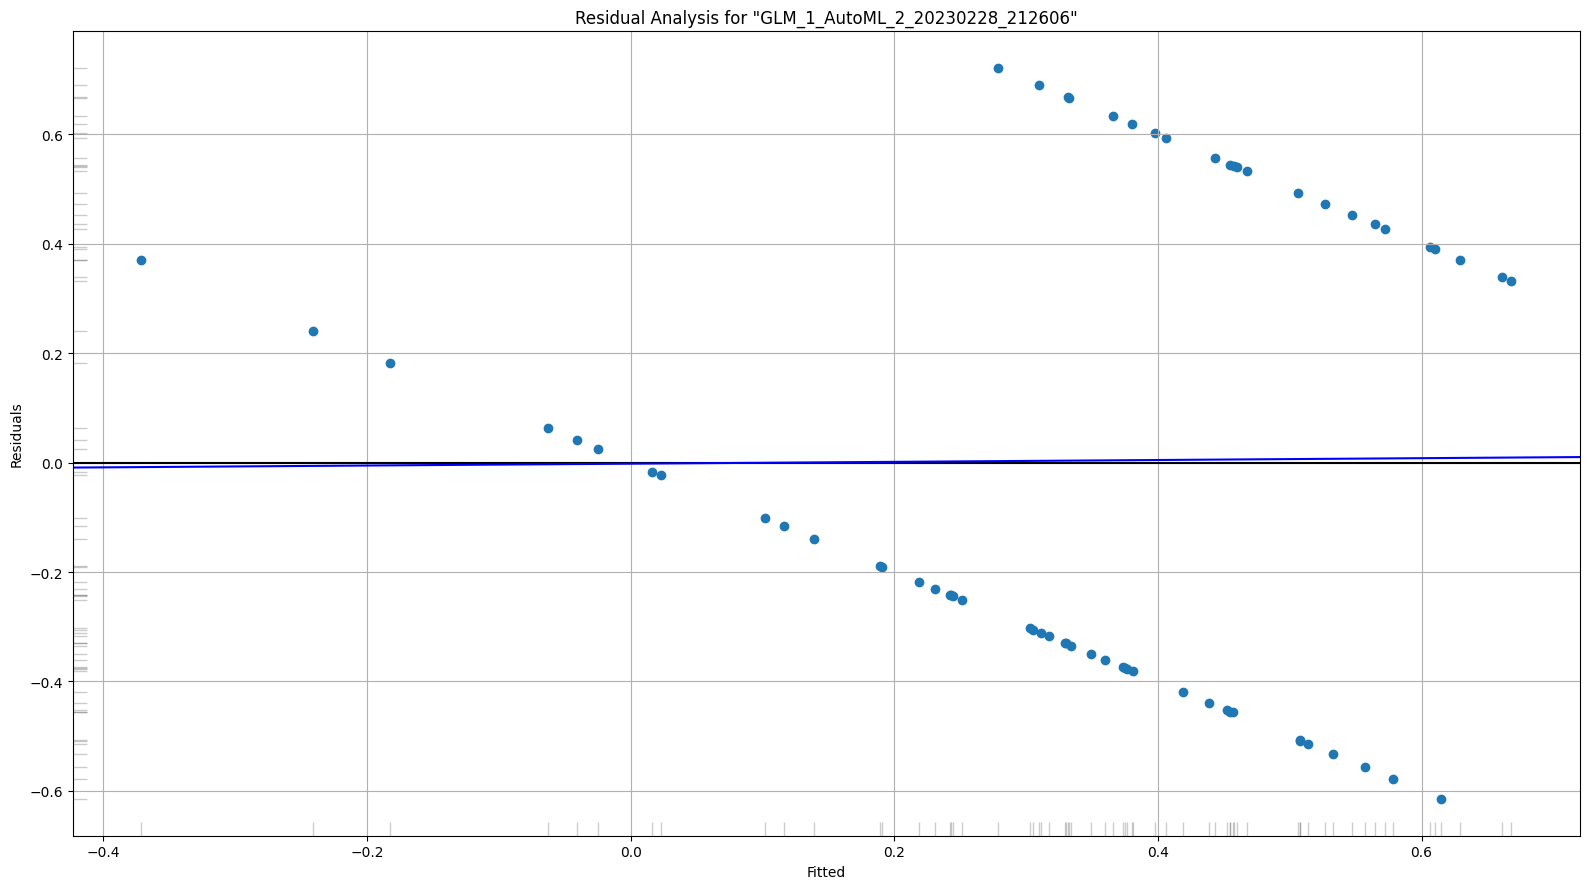

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

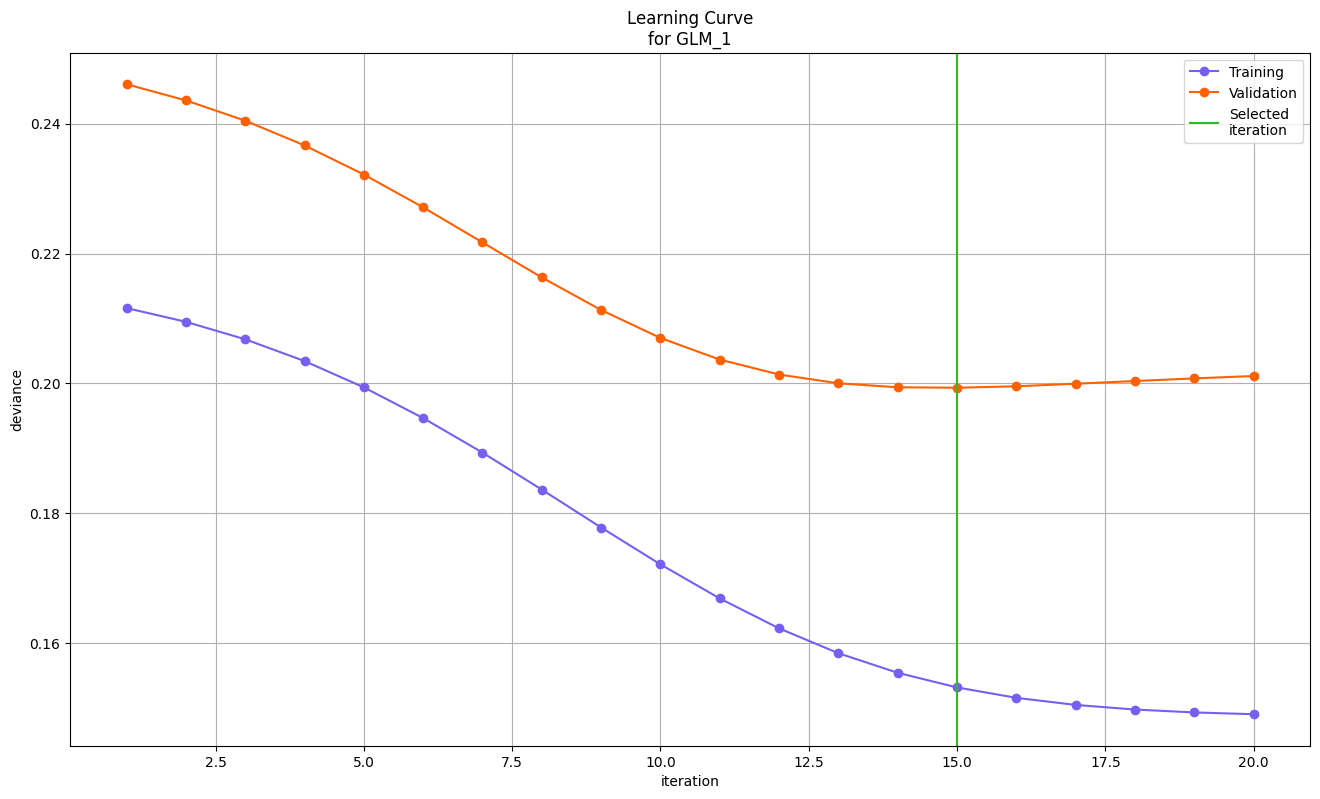

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

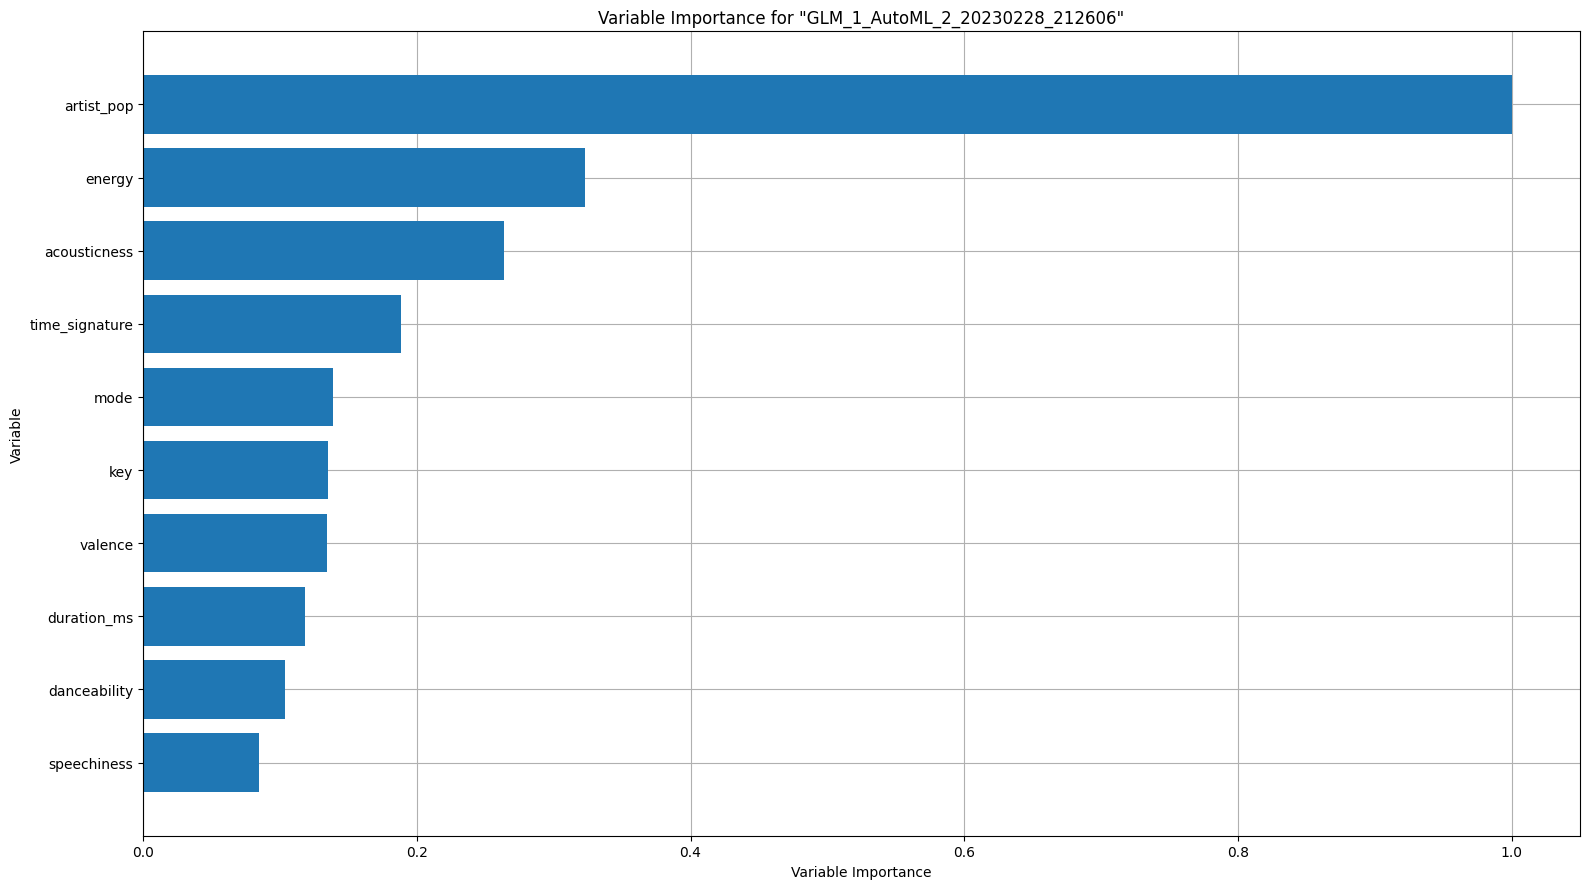

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

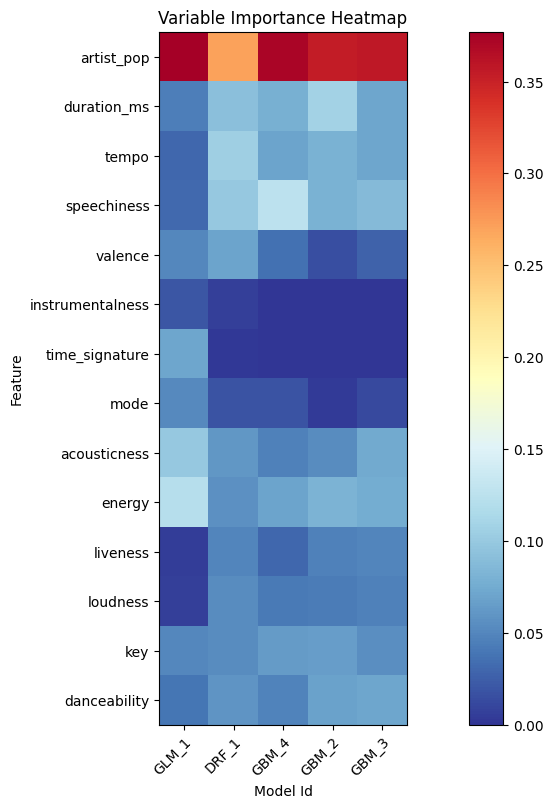

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

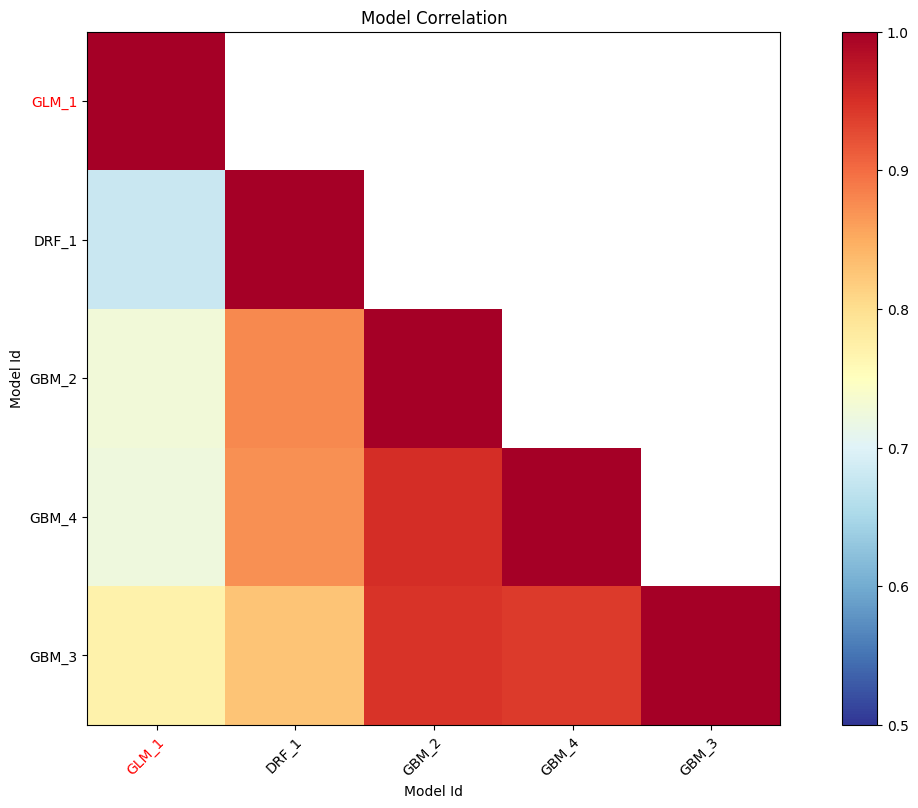

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

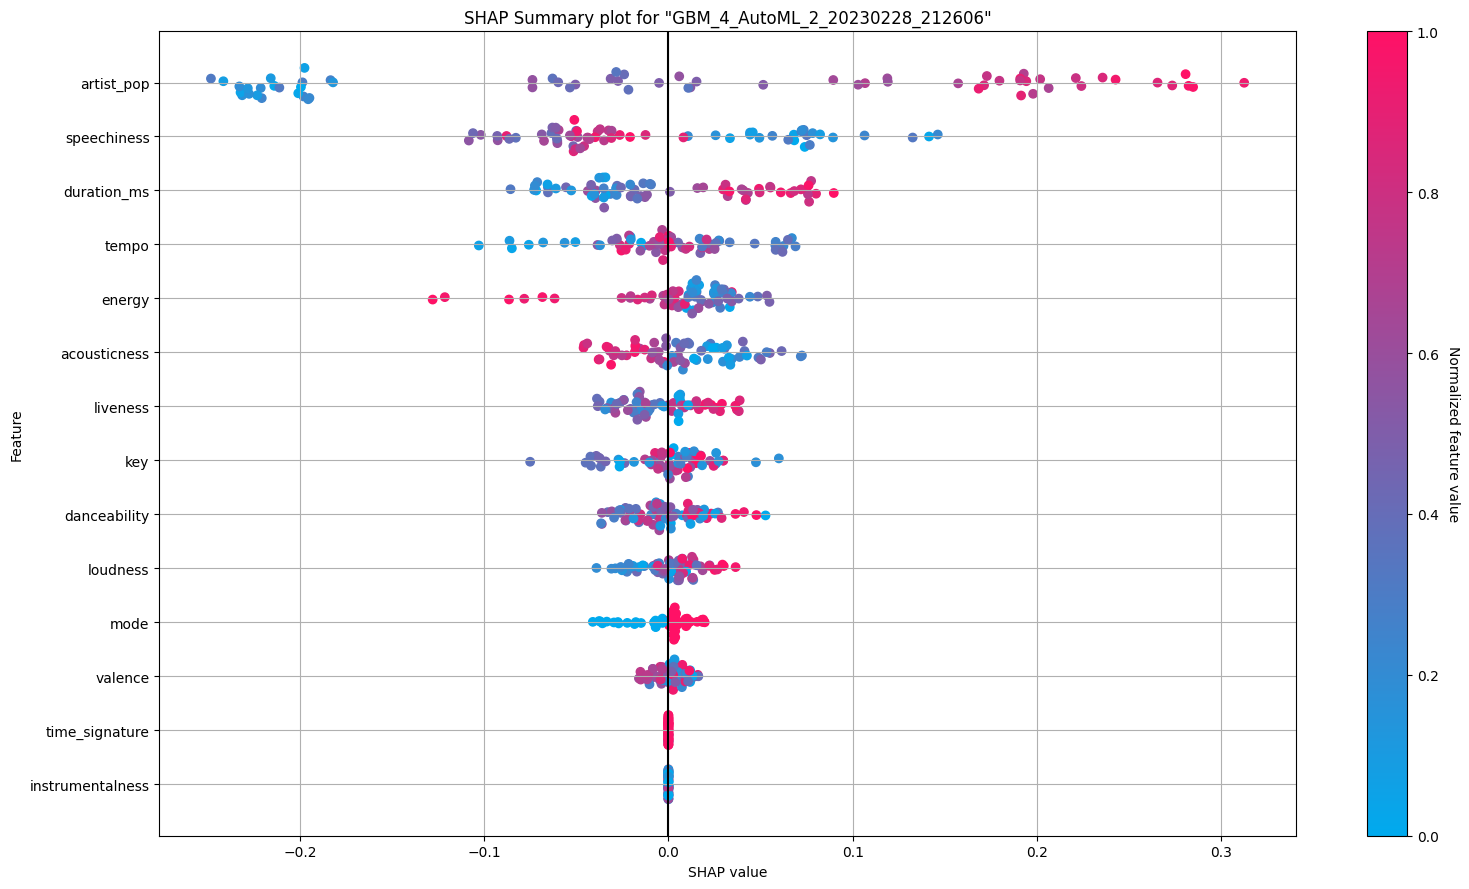

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

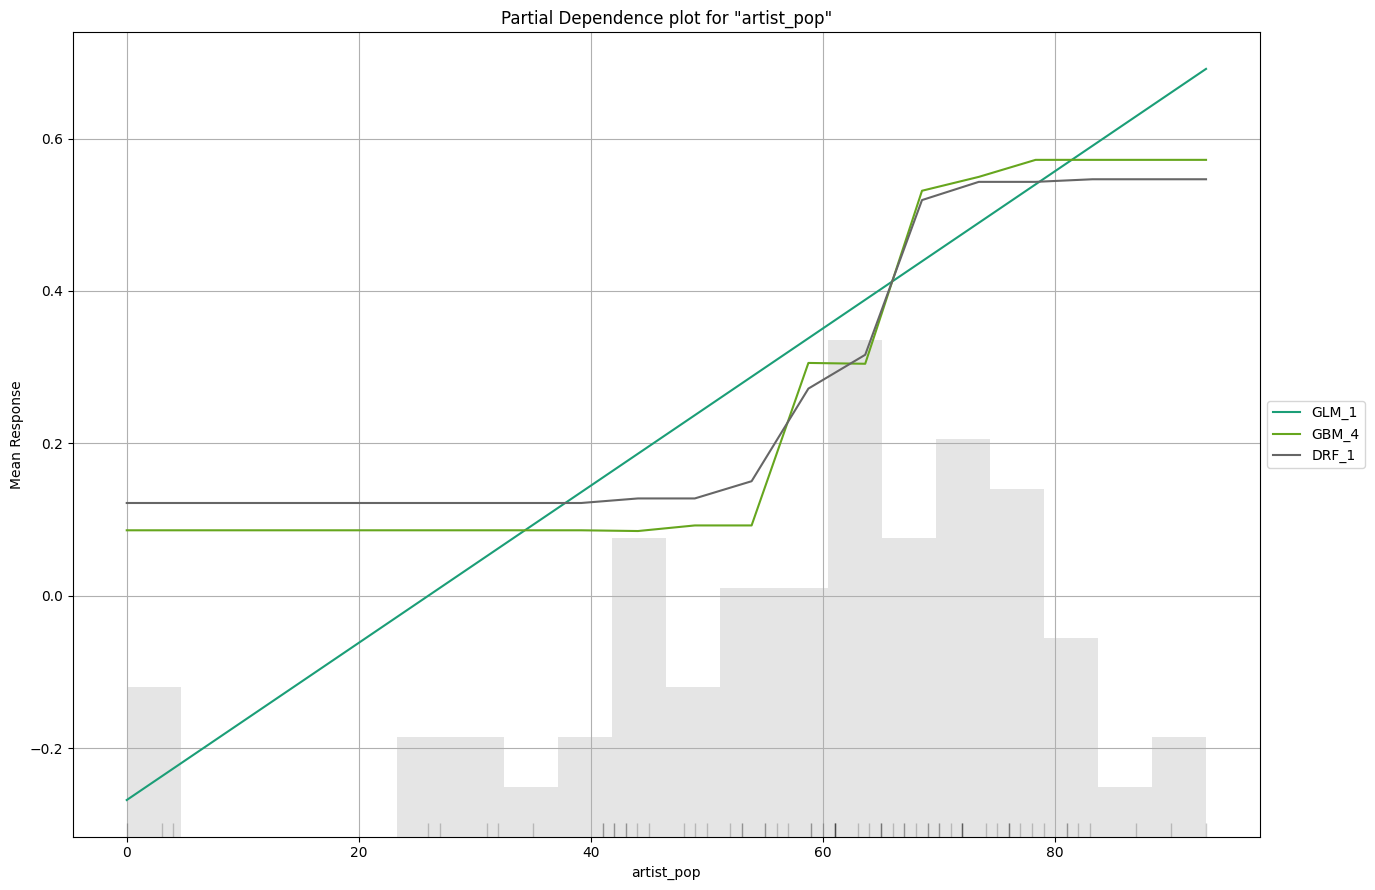

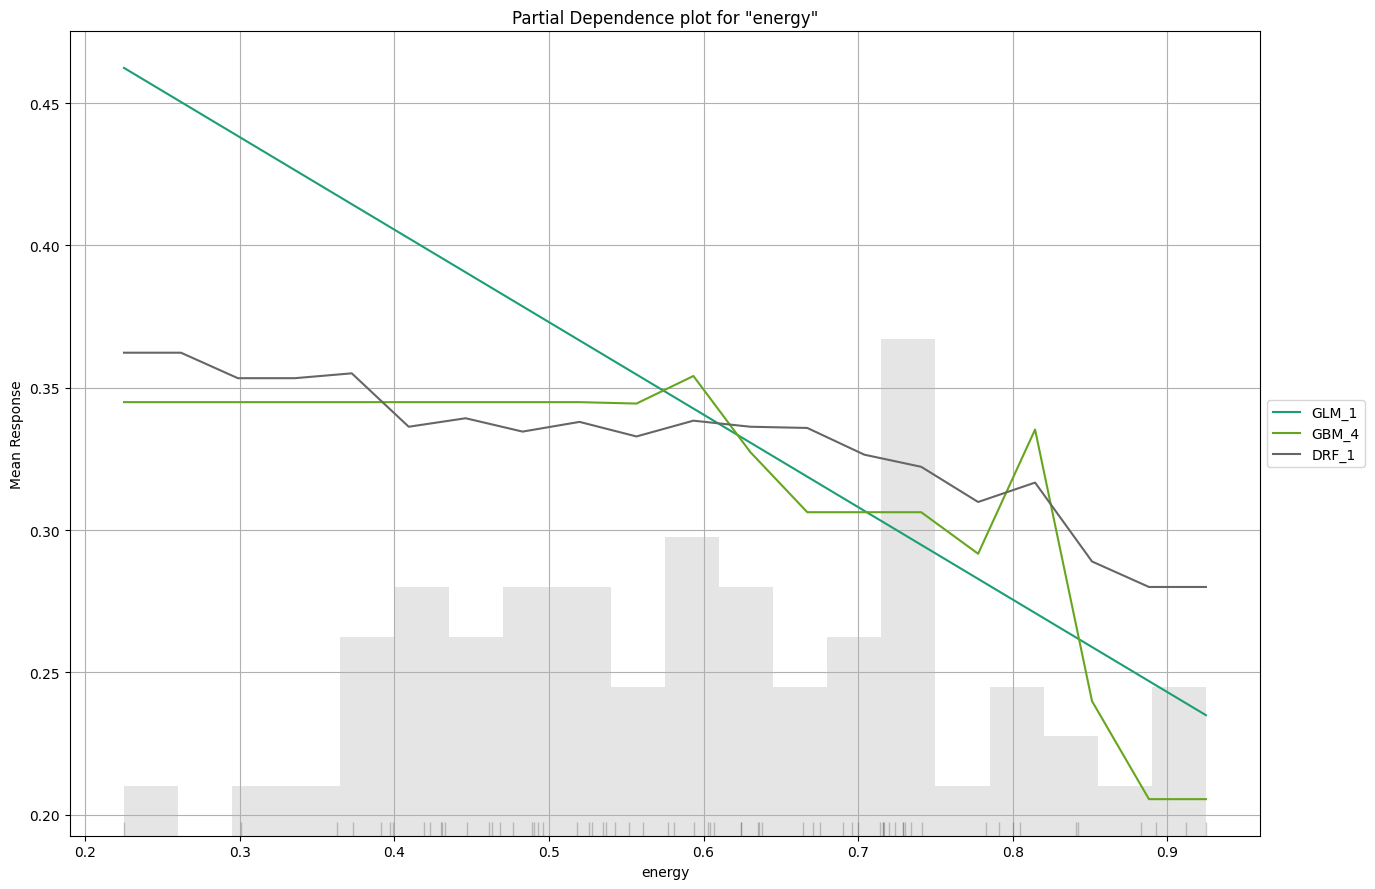

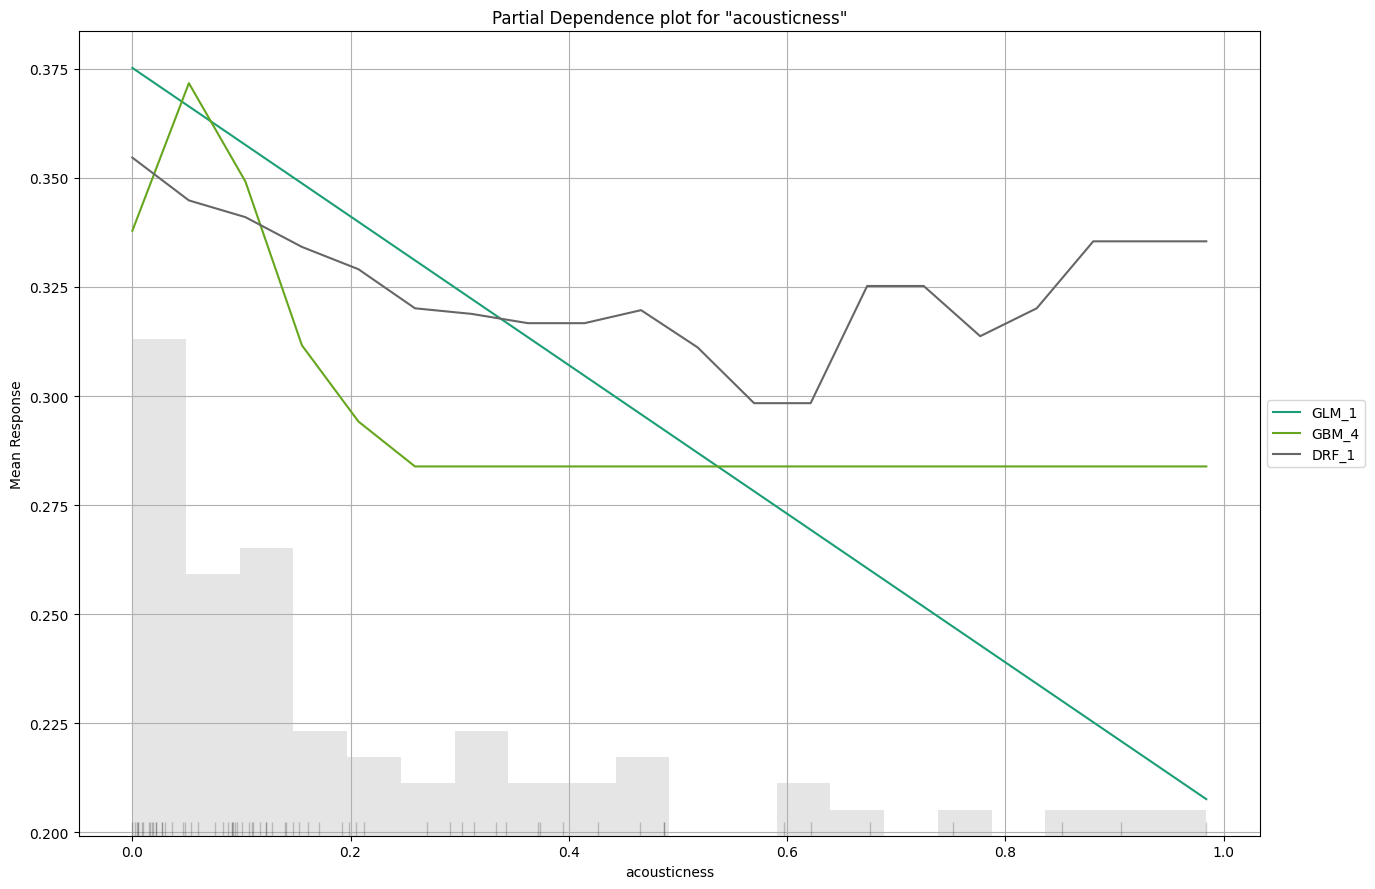

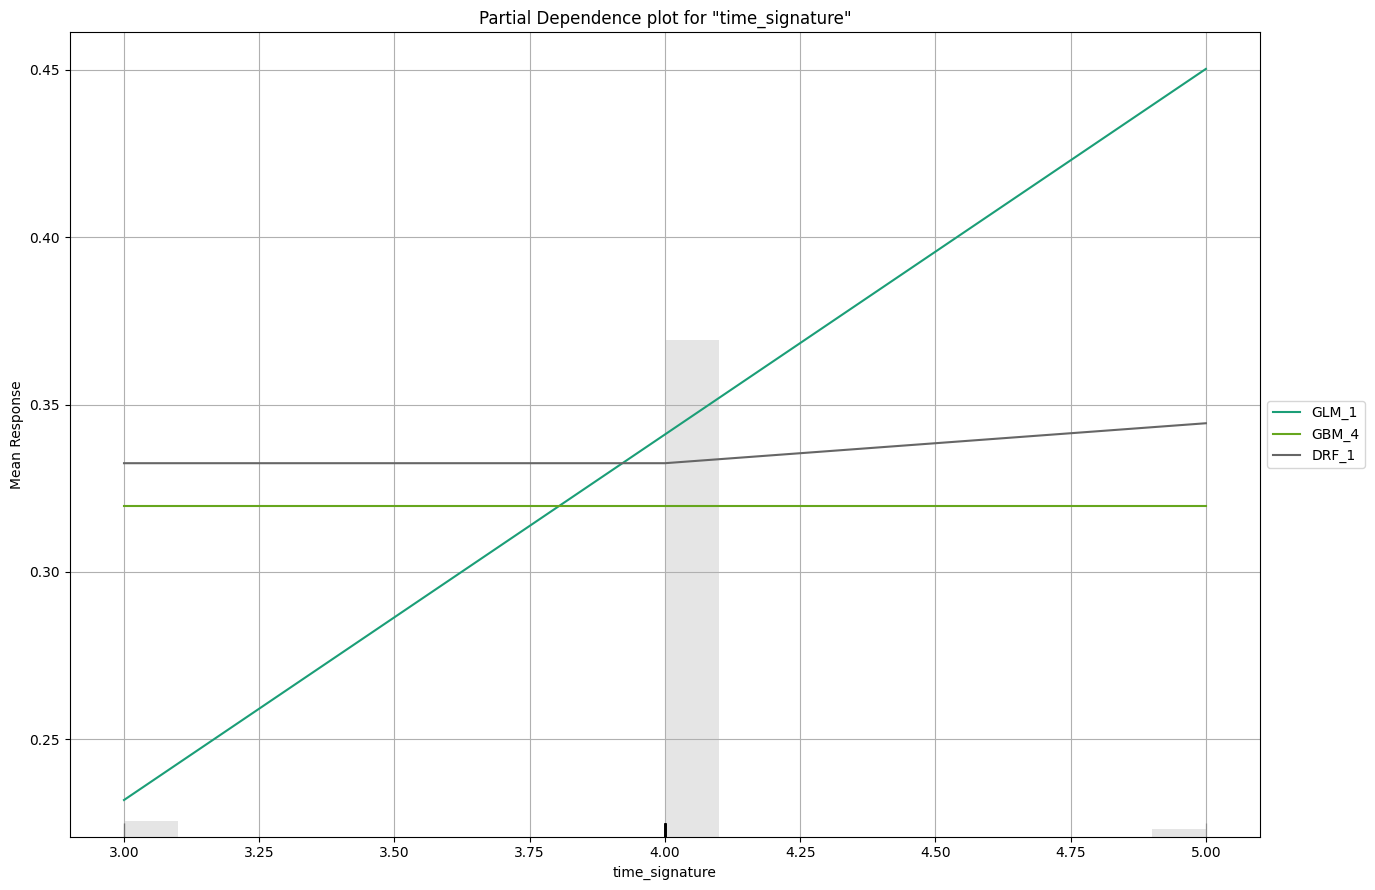

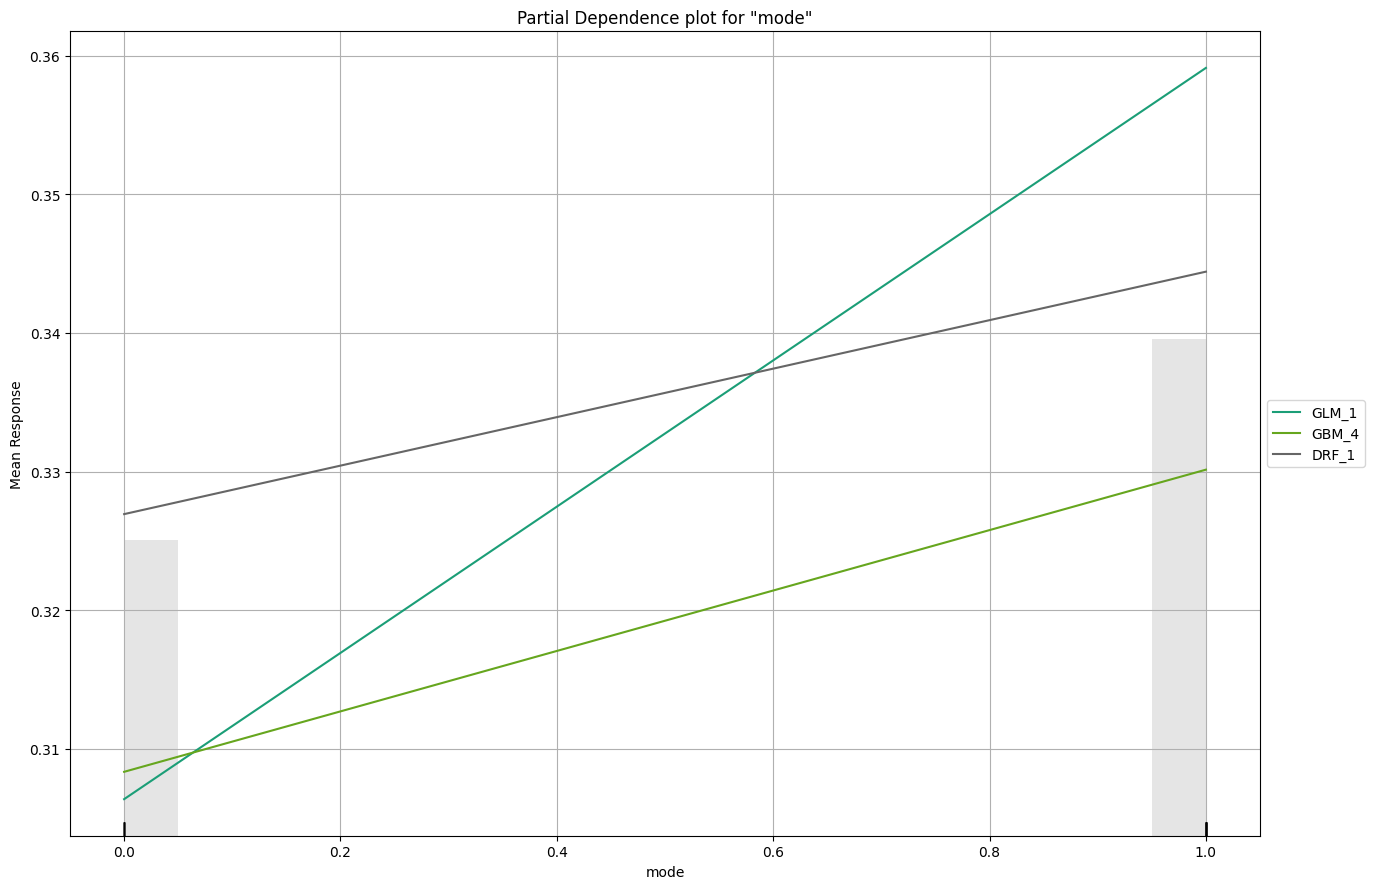

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

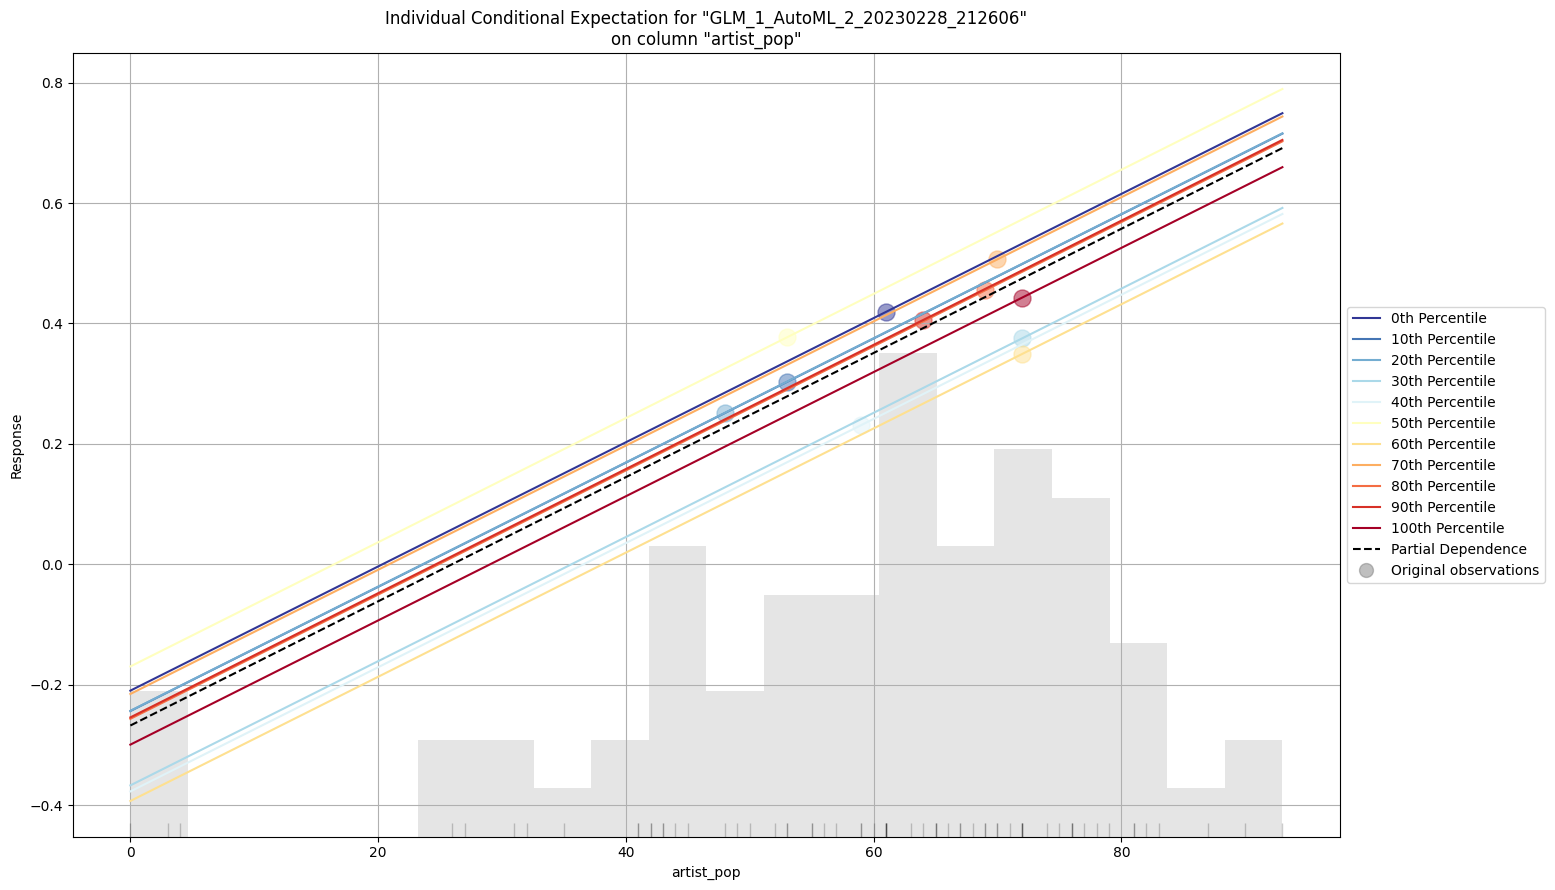

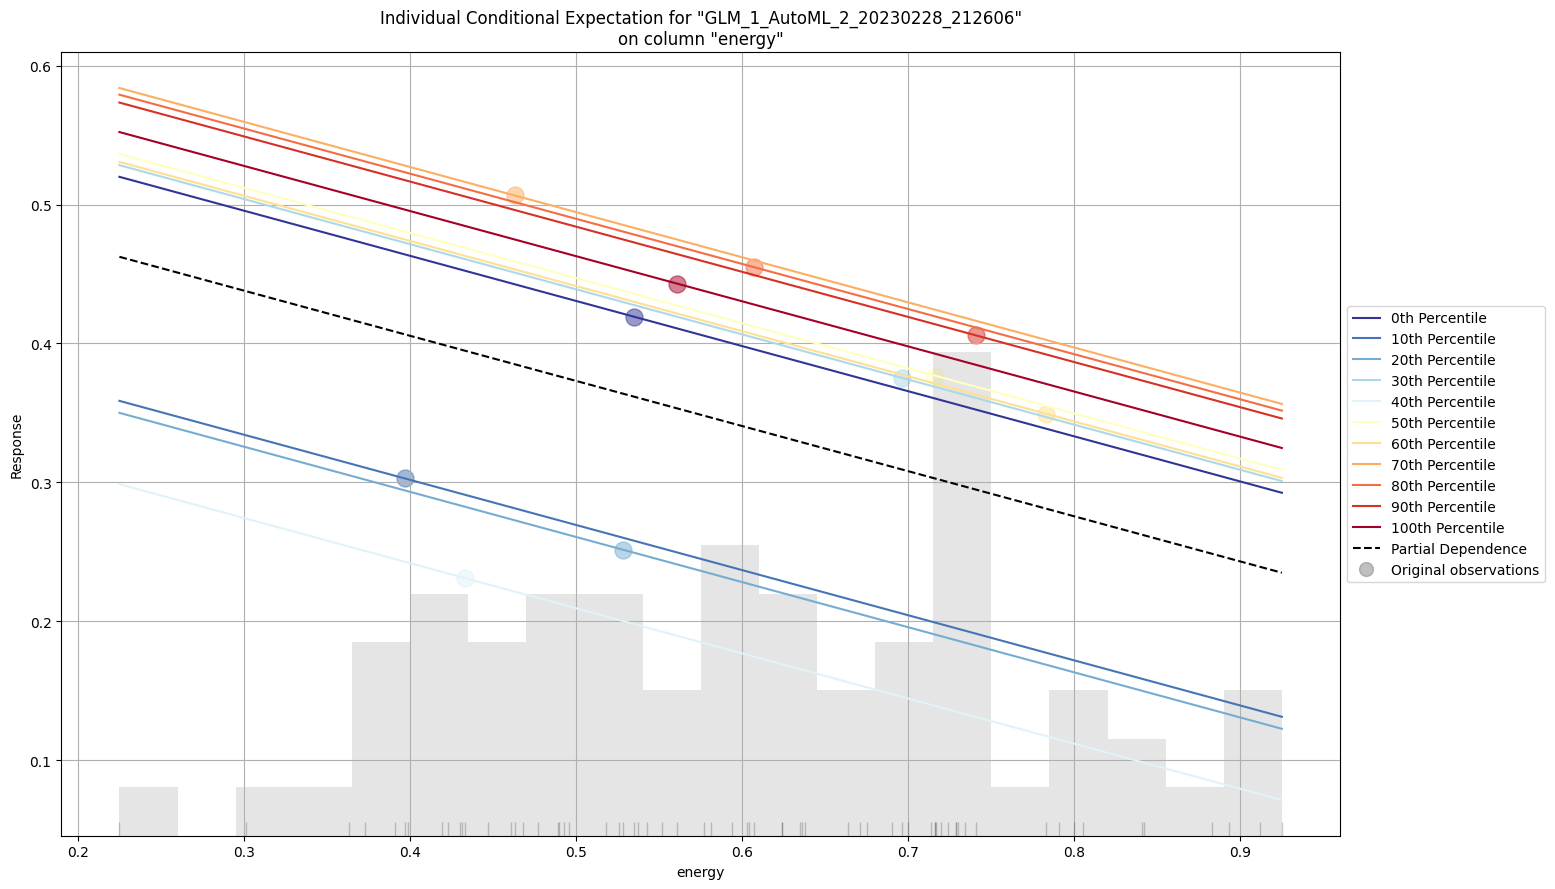

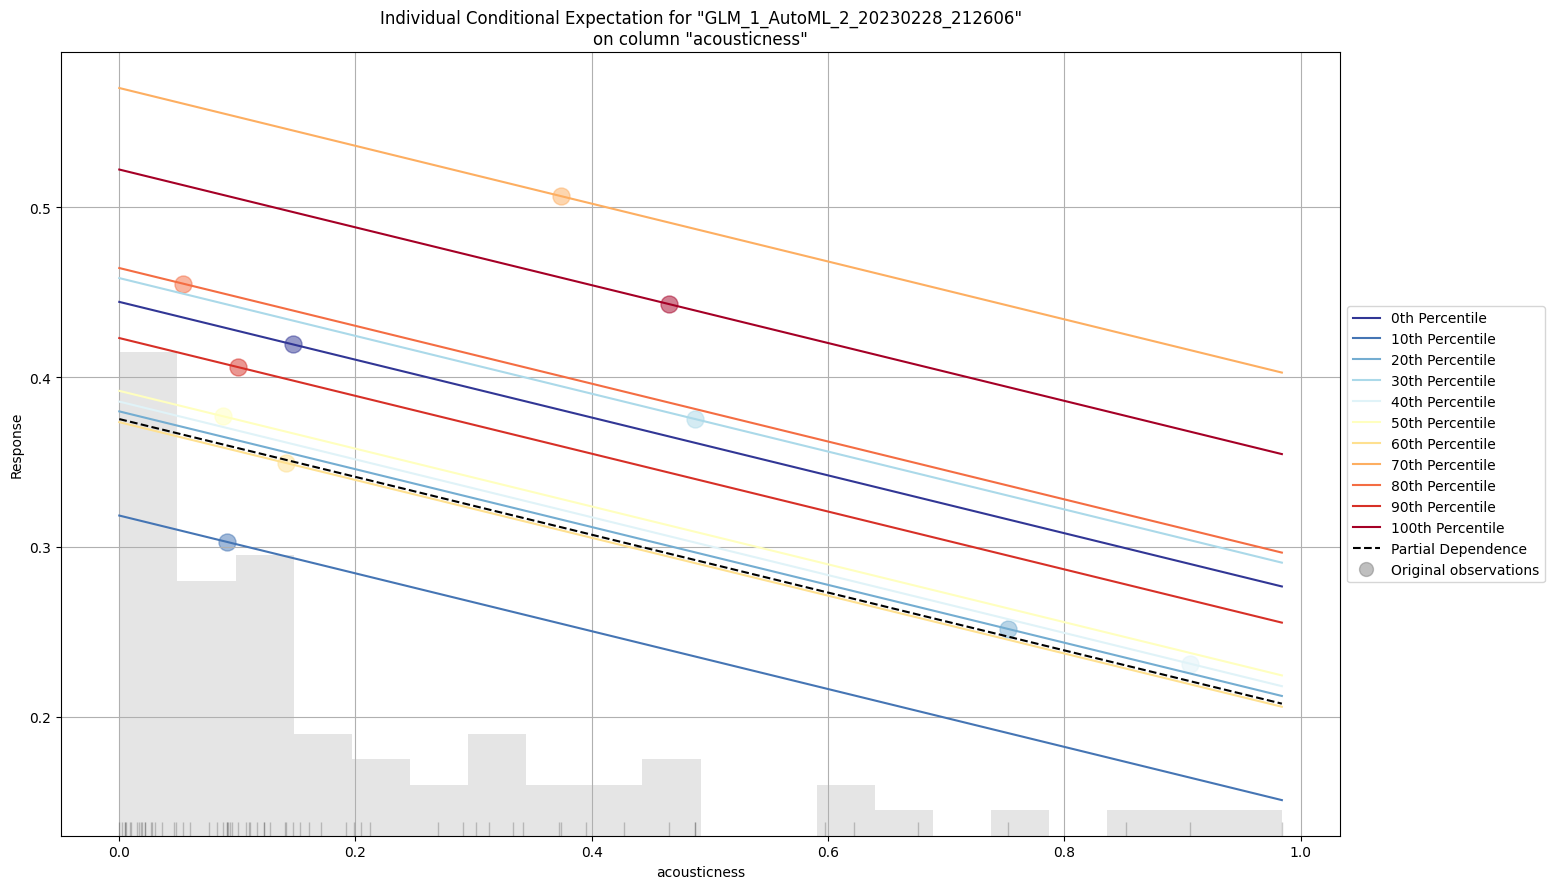

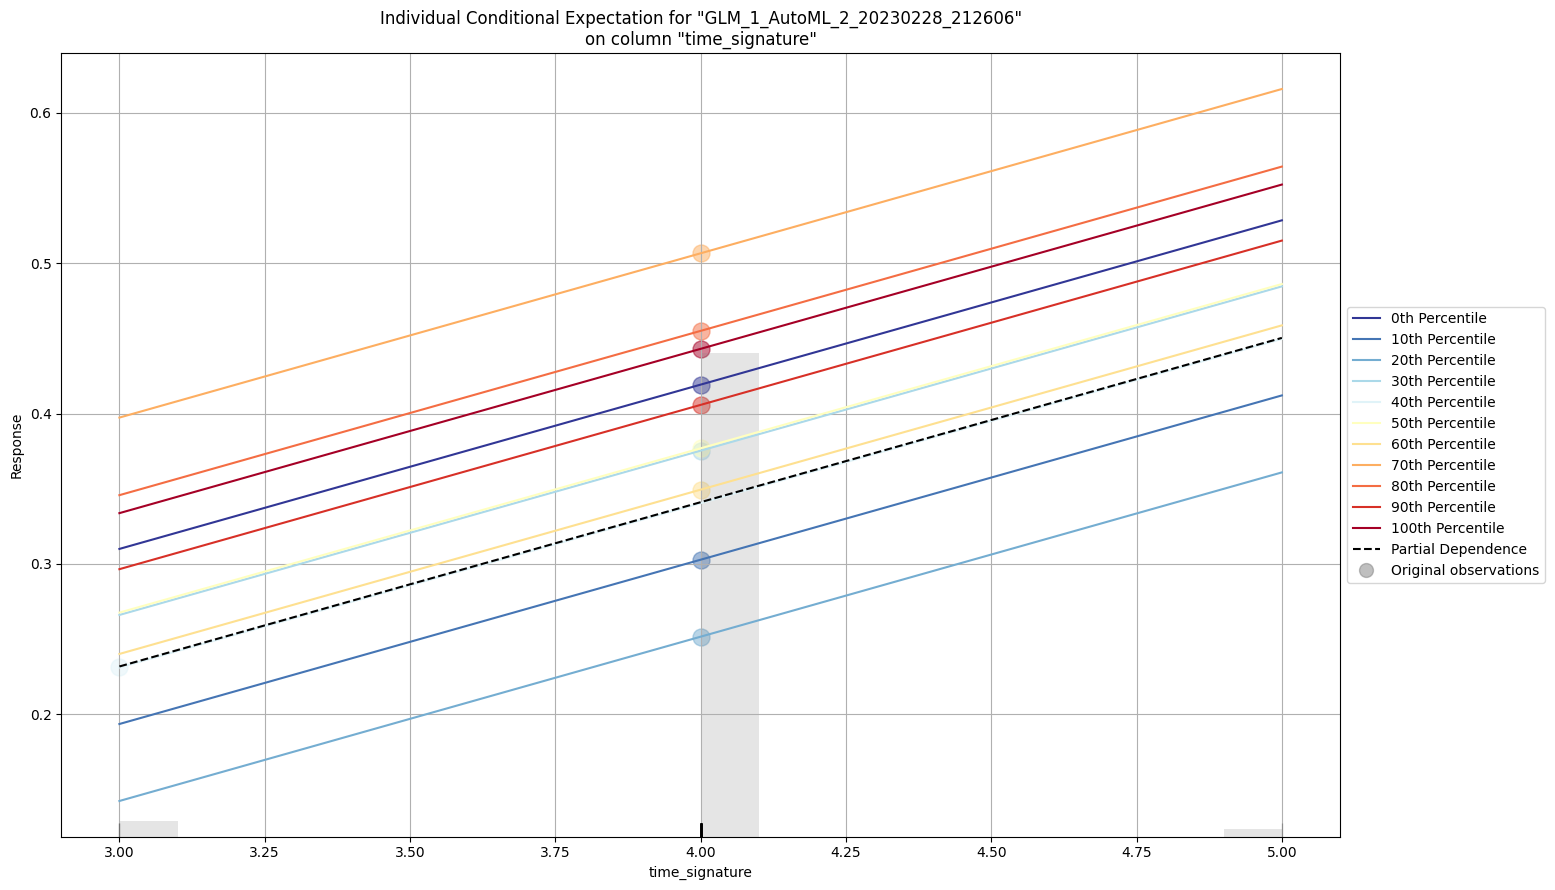

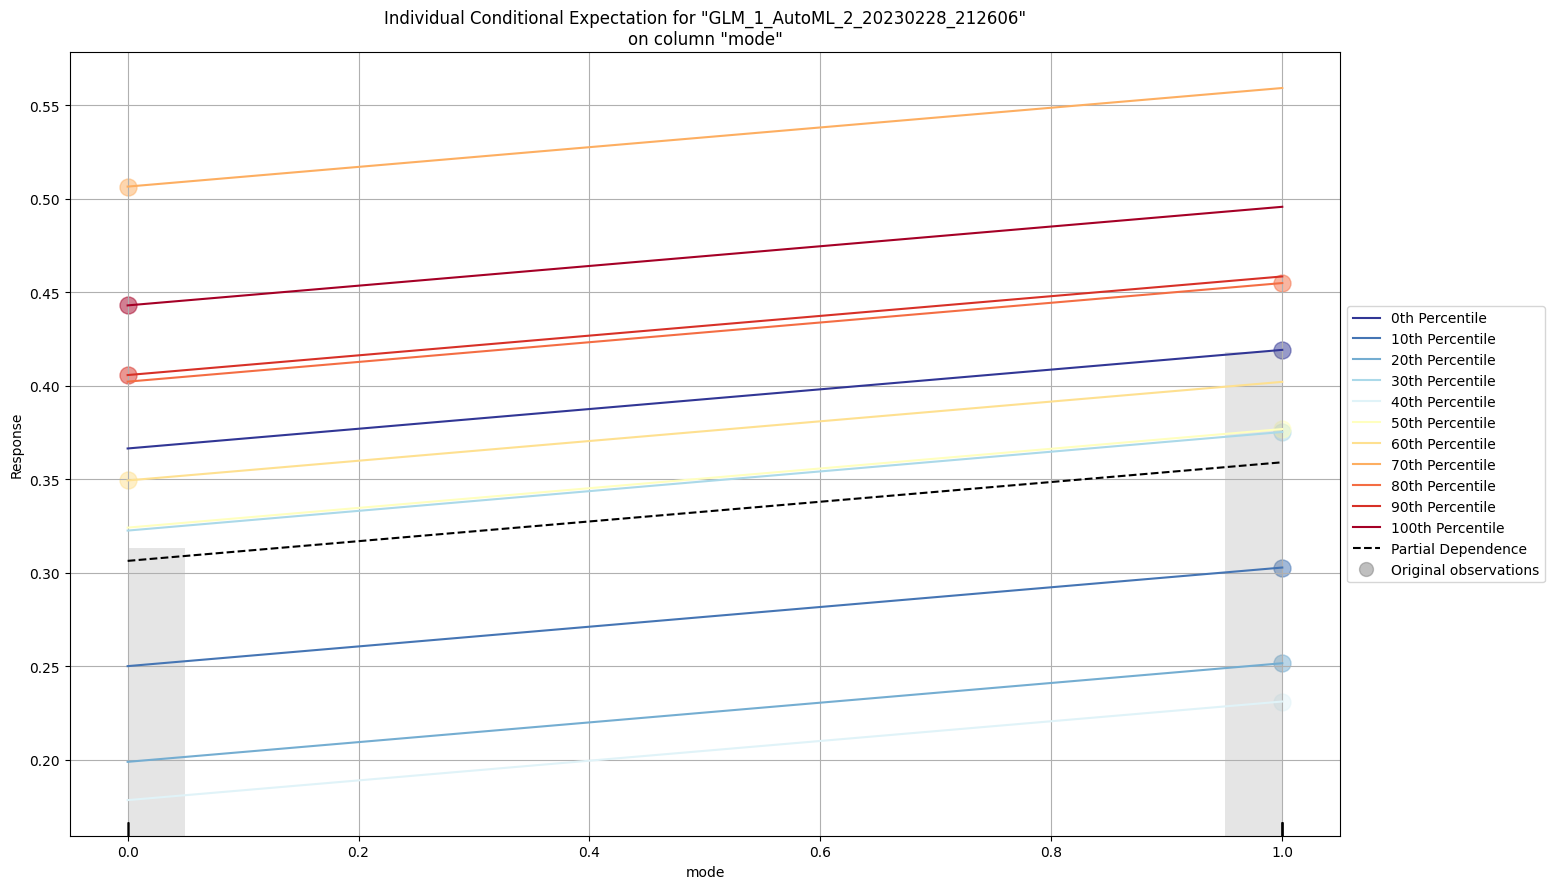



H2OExplanation([('leaderboard', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x000001A2DD058AC0>), ('description', <h2o.explanation._explain.Description object at 0x000001A2D623C850>), ('data', H2OFrame({'_ex': <Expr(makeLeaderboard ['GLM_1_AutoML_2_20230228_212606', 'GBM_4_AutoML_2_20230228_212606', 'GBM_3_AutoML_2_20230228_212606', 'GBM_2_AutoML_2_20230228_212606', 'DRF_1_AutoML_2_20230228_212606'] 'Key_Frame__upload_b70c81103e0aba8025c7f0f258a14311.hex' 'AUTO' 'ALL' 'AUTO')#py_240_sid_a4c6>}))])), ('residual_analysis', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x000001A2DD057AC0>), ('description', <h2o.explanation._explain.Description object at 0x000001A2BE10F670>), ('plots', H2OExplanation([('GLM_1_AutoML_2_20230228_212606', <h2o.plot._plot_result._MObject object at 0x000001A2DD4F98A0>)]))])), ('learning_curve', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x000001A2BCF147F0>), ('description', <h2o.expl

In [157]:
from h2o import explanation
explanation = aml.explain(h2o_test)
print(explanation)

In [158]:
type(predictions1)

h2o.frame.H2OFrame

In [159]:
predictions1

predict
---------
0.419234
0.0163296
0.311653
0.547379
0.572552
0.506552
0.309519
0.116237
0.330005
0.459748
[67 rows x 1 column]

In [160]:
pred1 = predictions1.as_data_frame()
pred1.head()

predict
0  0.419234
1  0.016330
2  0.311653
3  0.547379
4  0.572552

In [161]:
pc = pred1.copy()
pc.head()

predict
0  0.419234
1  0.016330
2  0.311653
3  0.547379
4  0.572552

In [162]:
pc['predict'] = pc['predict'] * 100

In [163]:
pc.head()

predict
0  41.923402
1   1.632960
2  31.165278
3  54.737889
4  57.255211

In [164]:
convert_func = lambda x: 1 if x > 65 else 0 

# Apply the lambda function to the 'col' column
pc['predict'] = pc['predict'].apply(convert_func)

# Display the updated DataFrame
print(pc.head())

   predict
0        0
1        0
2        0
3        0
4        0


In [165]:
pc.value_counts()

predict
0          65
1           2
dtype: int64

In [166]:
type(predictions1)
len(predictions1) 

67

In [167]:
y_test=h2o_test.as_data_frame()
Y_test=y_test['popular']
type(Y_test)
len(Y_test)

67

In [168]:
y_test

track_name              artist_name  artist_pop  \
0   Back Up (feat. Big Sean)                 DeJ Loaf          61   
1                     Vibin'                Kesh Kesh          27   
2                Hokus Pokus       Insane Clown Posse          63   
3   Cash Shit (feat. DaBaby)      Megan Thee Stallion          82   
4                 successful            Ariana Grande          87   
..                       ...                      ...         ...   
62                 VALENTINO                 24kGoldn          74   
63               Video Games  The Young Professionals          41   
64                    Myself                    Bazzi          72   
65                    Runway              Stunna Girl          45   
66             Smack a Bitch               Rico Nasty          67   

                    album  danceability  energy  loudness  mode  key  \
0    #AndSeeThatsTheThing         0.816   0.535    -8.302     1    9   
1                  Vibin'         0.686   0.805    -6.816     0   11   
2       The Great Milenko         0.870   0.841    -5.084     0   11   
3                   Fever         0.921   0.635    -4.904     1    1   
4               Sweetener         0.847   0.603    -4.607     0    0   
..                    ...           ...     ...       ...   ...  ...   
62  DROPPED OUTTA COLLEGE         0.746   0.717    -4.841     0    9   
63       Remixes & Covers         0.565   0.893    -4.683     0    4   
64                 COSMIC         0.745   0.561    -5.513     0    9   
65                YKWTFGO         0.638   0.912    -3.300     1    1   
66          Smack a Bitch         0.703   0.700    -2.417     1    2   

    speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0        0.3380       0.14700          0.000005    0.1760    0.435   80.012   
1        0.1540       0.00478          0.000001    0.0887    0.289  130.981   
2        0.0948       0.01930          0.000077    0.3330    0.857   92.176   
3        0.4160       0.02180          0.000000    0.0946    0.549  130.028   
4        0.0397       0.10700          0.000007    0.1060    0.735  114.045   
..          ...           ...               ...       ...      ...      ...   
62       0.1790       0.19900          0.000000    0.1320    0.523  150.964   
63       0.0376       0.03030          0.000000    0.0561    0.352  141.957   
64       0.0720       0.46500          0.000001    0.0338    0.902  195.918   
65       0.4740       0.01550          0.000000    0.2340    0.725  190.178   
66       0.2210       0.00550          0.000000    0.1150    0.340  169.861   

    time_signature  duration_ms  popular  
0                4       241267        0  
1                4       154567        0  
2                4       261173        0  
3                4       192540        1  
4                4       227387        1  
..             ...          ...      ...  
62               4       179133        1  
63               4       228706        0  
64               4       167553        1  
65               4       152464        0  
66               4       138353        0  

[67 rows x 18 columns]

In [169]:
Y_test.head()

0    0
1    0
2    0
3    1
4    1
Name: popular, dtype: int64

In [170]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pc)
print(cm)

[[44  0]
 [21  2]]


In [171]:
from sklearn.metrics import accuracy_score, classification_report
report = classification_report(Y_test,pc)
print(report)
acc= accuracy_score(Y_test,pc)
print("Accuracy is: ",acc)

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        44
           1       1.00      0.09      0.16        23

    accuracy                           0.69        67
   macro avg       0.84      0.54      0.48        67
weighted avg       0.79      0.69      0.59        67

Accuracy is:  0.6865671641791045


#Answer To The Following Questions
* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?




#Q1. Is the relationship significant?

In [172]:
print(aml.leader.varimp())

[('artist_pop', 0.1789652705192566, 1.0, 0.3770849048863612), ('energy', 0.057820677757263184, 0.3230832305592034, 0.12182980926579552), ('acousticness', 0.047146011143922806, 0.26343664894943913, 0.09933798371268099), ('time_signature', 0.03368734195828438, 0.18823396215669472, 0.07098018571624015), ('mode', 0.024856694042682648, 0.13889116011482283, 0.052373759901454334), ('key', 0.024236487224698067, 0.13542564517896355, 0.05106696653148357), ('valence', 0.024018259719014168, 0.13420626051818144, 0.05060715498265267), ('duration_ms', 0.021147383376955986, 0.11816473283111394, 0.044558137040542886), ('danceability', 0.018516501411795616, 0.10346421603516225, 0.039014794062761086), ('speechiness', 0.015168087556958199, 0.08475436330718768, 0.03195959102639497), ('tempo', 0.01401455421000719, 0.07830879236706001, 0.029529063521498634), ('instrumentalness', 0.009783657267689705, 0.05466790980899832, 0.020614443570662305), ('loudness', 0.0028756510000675917, 0.016068206930451193, 0.00605

In [173]:
print(type(aml.leader.varimp()))
di={}
for i in aml.leader.varimp():
  print(i)
  dii={}
  dii['relative_importance']=i[1]
  dii['scaled_importance']=i[2]
  di[i[0]]=dii

<class 'list'>
('artist_pop', 0.1789652705192566, 1.0, 0.3770849048863612)
('energy', 0.057820677757263184, 0.3230832305592034, 0.12182980926579552)
('acousticness', 0.047146011143922806, 0.26343664894943913, 0.09933798371268099)
('time_signature', 0.03368734195828438, 0.18823396215669472, 0.07098018571624015)
('mode', 0.024856694042682648, 0.13889116011482283, 0.052373759901454334)
('key', 0.024236487224698067, 0.13542564517896355, 0.05106696653148357)
('valence', 0.024018259719014168, 0.13420626051818144, 0.05060715498265267)
('duration_ms', 0.021147383376955986, 0.11816473283111394, 0.044558137040542886)
('danceability', 0.018516501411795616, 0.10346421603516225, 0.039014794062761086)
('speechiness', 0.015168087556958199, 0.08475436330718768, 0.03195959102639497)
('tempo', 0.01401455421000719, 0.07830879236706001, 0.029529063521498634)
('instrumentalness', 0.009783657267689705, 0.05466790980899832, 0.020614443570662305)
('loudness', 0.0028756510000675917, 0.016068206930451193, 0.006

In [174]:
rf = pd.DataFrame.from_dict(di, orient='index')

print("TOP 5 relevant features in ascending order:")

print(rf.head())

print("----------------------------------------------------------------------")

print("**Higher relative importance value indicates greater significance.!**")


TOP 5 relevant features in ascending order:
                relative_importance  scaled_importance
artist_pop                 0.178965           1.000000
energy                     0.057821           0.323083
acousticness               0.047146           0.263437
time_signature             0.033687           0.188234
mode                       0.024857           0.138891
----------------------------------------------------------------------
**Higher relative importance value indicates greater significance.!**


#varimp():

The varimp() function returns a table with the columns listed below:
* variable: The predictor variable's name.
* relative importance: A variable's "relative importance" is typically a numeric value or score that indicates how much that variable contributes to the prediction or outcome in comparison to other predictor variables in the model. By focusing on the most important factors that influence a specific outcome, relative importance analysis can help decision-makers prioritize their efforts and allocate resources more effectively. To estimate the relative importance of different variables, statistical methods such as regression analysis, factor analysis, and decision trees can be used.
* scaled importance: The normalized importance score is calculated by dividing each variable's relative importance score by the sum of all variables' relative importance scores in the model. The end result is a percentage or proportion indicating the relative contribution of each variable to the model's prediction.

Text(0.5, 1.0, 'Variable Correlation')

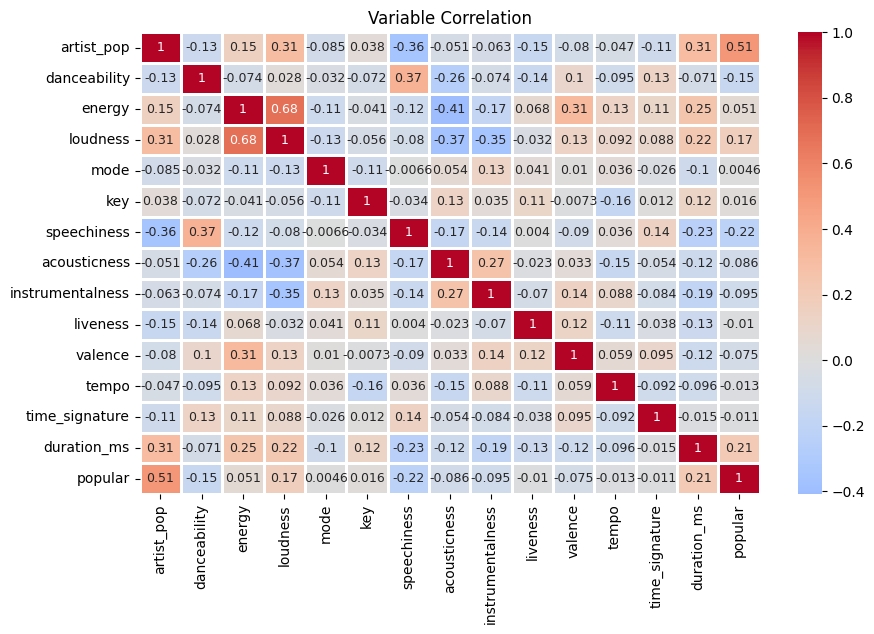

In [175]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(ttdata.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')


# Q2. Are any model assumptions violated?

Since my database is based on Logistic Regression, there are a total of six assumptions.
- Assumption 1: The Response Variable is Binary 
- Assumption 2: The Observations are Independent 
- Assumption 3: There is No Multicollinearity Among Explanatory Variables 
- Assumption 4: There are No Extreme Outliers 
- Assumption 5: There is a Linear Relationship Between Explanatory Variables and the Logit of the response variable.
- Assumption 6: The sample size is adequate.

Assumption 1: 

The first assumption is that there are only two response variables.
- 0 - Unpopular song 
- 1 - Popular song
As a result, we can conclude that the response is binary.

Assumption 2:

Yes, we can see in the sns pairplot that there are no collinearity between features and that they are relatively independent of one another, as most data points are.

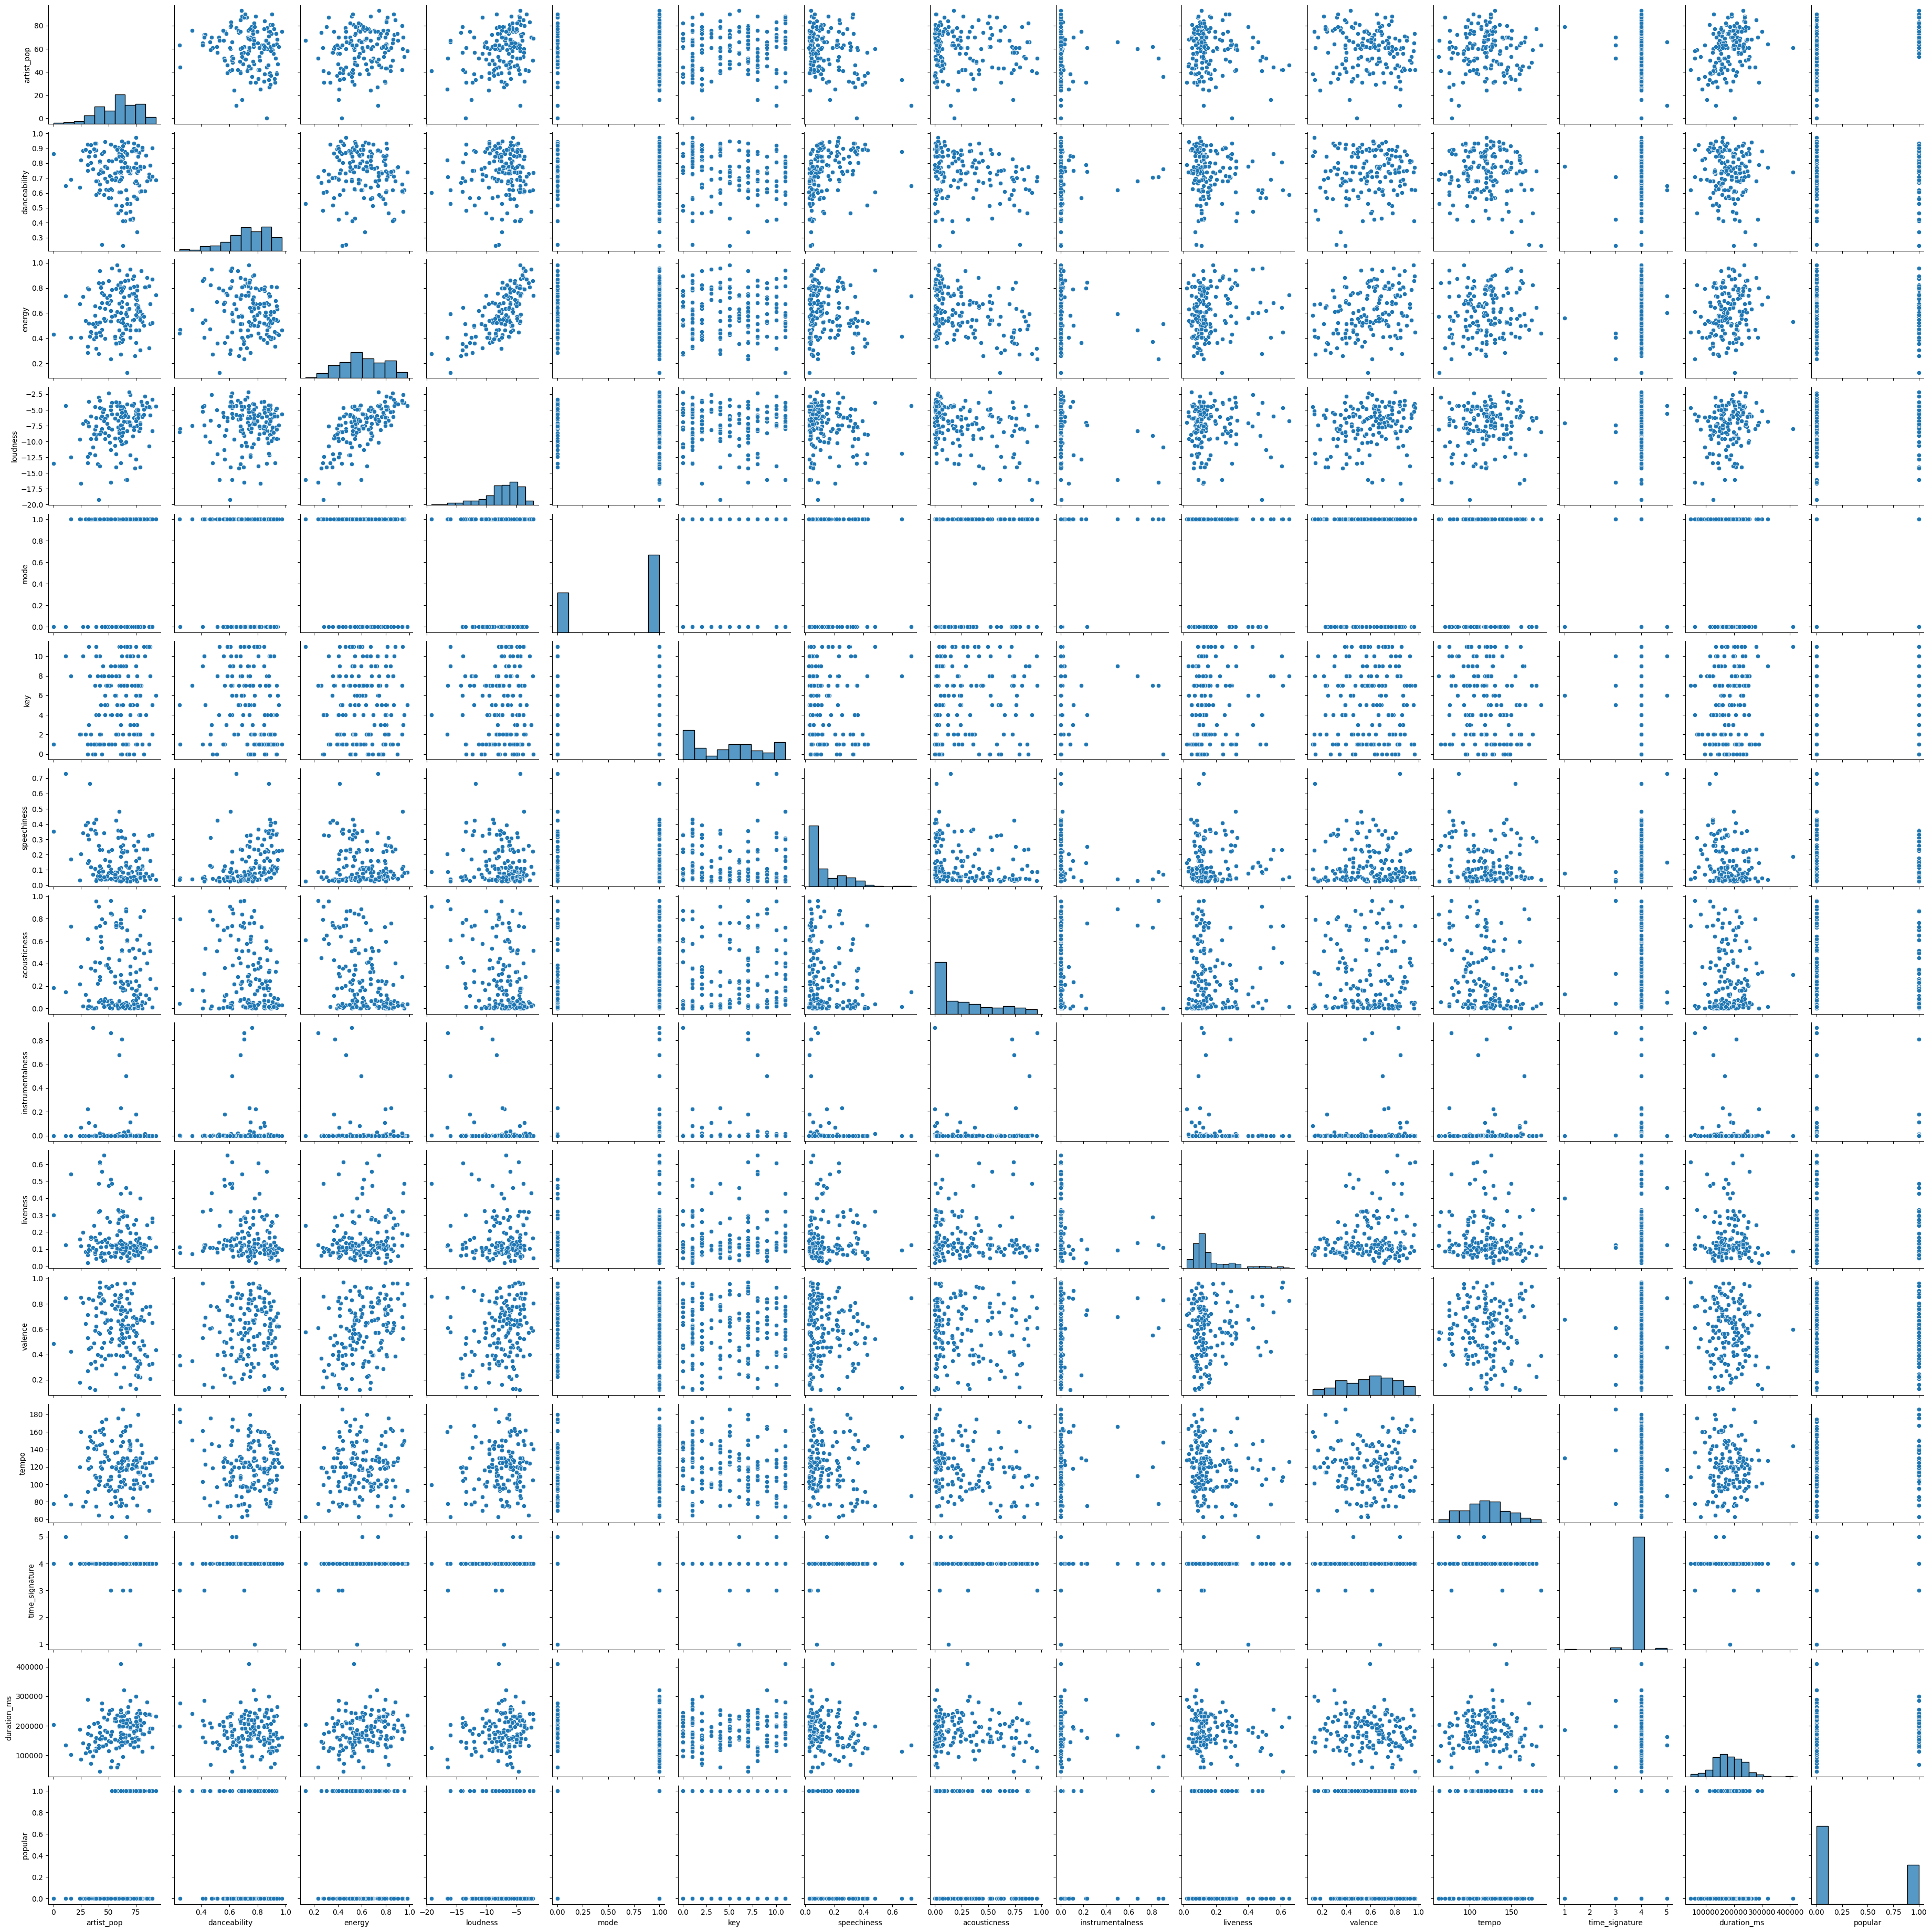

In [176]:
sns.pairplot(h2o_train.as_data_frame())

Assumption 3: 

The explanatory variables are not multicollinear.

Assumption 4:

In [177]:
h2o_train

track_name                      artist_name         artist_pop  album                                                  danceability    energy    loudness    mode    key    speechiness    acousticness    instrumentalness    liveness    valence    tempo    time_signature    duration_ms    popular
------------------------------  ----------------  ------------  ---------------------------------------------------  --------------  --------  ----------  ------  -----  -------------  --------------  ------------------  ----------  ---------  -------  ----------------  -------------  ---------
I Don't Mind (feat. Juicy J)    Usher                       78  I Don't Mind (feat. Juicy J)                                  0.87      0.464      -8.337       1      4         0.178         0.205               0             0.0902      0.457  112.974                 4         251989          1
Psycho!                         MASN                        60  Psycho!                                                       0.868     0.365      -9.51        1      7         0.0383        0.433               0             0.207       0.471  114.979                 4         197217          0
GOODMORNINGTOKYO!               TOKYO’S REVENGE             59  GOODMORNINGTOKYO!                                             0.907     0.539      -7.782       1      4         0.36          0.0408              0             0.253       0.664  124.918                 4         150115          1
Steppin'                        Supa Dupa Humble            38  Steppin'                                                      0.85      0.58       -4.502       1      1         0.104         0.000404            0.0821        0.0714      0.12   160.055                 4         145253          0
Walk Man                        Tiny Meat Gang              52  Walk Man                                                      0.928     0.696      -4.972       0      4         0.0866        0.331               0.000119      0.121       0.396   94.994                 4         165938          0
7 rings                         Ariana Grande               87  7 rings                                                       0.725     0.321     -10.744       0      1         0.323         0.578               0             0.0884      0.319   70.142                 4         178640          0
Out There                       Patrick Page                44  The Hunchback of Notre Dame (Studio Cast Recording)           0.252     0.469      -7.99        0      1         0.046         0.796               4.56e-06      0.0774      0.317  171.488                 4         275947          0
Get Up (feat. Chamillionaire)   Ciara                       68  Step Up Soundtrack                                            0.941     0.631      -5.998       0      1         0.114         0.0366              1.8e-06       0.0311      0.63   128.597                 4         263373          0
Jingle Bell Rock                Bobby Helms                 43  The Classic Years: 1956-1962                                  0.754     0.424      -8.463       1      2         0.0363        0.643               0             0.0652      0.806  119.705                 4         130973          0
Hall of Fame (feat. will.i.am)  The Script                  72  #3 Deluxe Version                                             0.421     0.873      -4.343       1     10         0.0564        0.0654              0             0.123       0.629   84.786                 4         202533          1
[156 rows x 18 columns]

In [178]:
h2o_train_pd = h2o_train.as_data_frame()
h2o_test_pd = h2o_test.as_data_frame()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
Logistic_Regression = LogisticRegression()
#h2o_train_pd = h2o_train_pd.dropna(axis=0, how='any', subset=None, inplace=False)
X1 = h2o_train_pd[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]
y1 = h2o_train_pd[['popular']]
X1_train_data, X1_test_data, y1_train_data, y1_test_data = train_test_split(X1, y1, test_size=0.3)
Logistic_Regression.fit(X1_train_data, y1_train_data)

X1_train_data, X1_test_data, y1_train_data, y1_test_data = train_test_split(X1, y1, test_size=0.3)
Logistic_Regression.fit(X1_train_data, y1_train_data)

LogisticRegression()

In [179]:
threshold = 0.5
y1_new=Logistic_Regression.predict(X1_test_data)
Accuracy=Logistic_Regression.score(X1_test_data, y1_test_data)
print(Accuracy)

0.6170212765957447


In [180]:
Quantile1 = h2o_train_pd.quantile(0.05)
Quantile2 = h2o_train_pd.quantile(0.95)

Final_MRS = h2o_train_pd[~((h2o_train_pd< (Quantile1)) |(h2o_train_pd > (Quantile2))).any(axis=1)]

In [181]:
Final_MRS.head()

track_name      artist_name  artist_pop  \
0  I Don't Mind (feat. Juicy J)            Usher          78   
1                       Psycho!             MASN          60   
2             GOODMORNINGTOKYO!  TOKYO’S REVENGE          59   
4                      Walk Man   Tiny Meat Gang          52   
8              Jingle Bell Rock      Bobby Helms          43   

                          album  danceability  energy  loudness  mode  key  \
0  I Don't Mind (feat. Juicy J)         0.870   0.464    -8.337     1    4   
1                       Psycho!         0.868   0.365    -9.510     1    7   
2             GOODMORNINGTOKYO!         0.907   0.539    -7.782     1    4   
4                      Walk Man         0.928   0.696    -4.972     0    4   
8  The Classic Years: 1956-1962         0.754   0.424    -8.463     1    2   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1780        0.2050          0.000000    0.0902    0.457  112.974   
1       0.0383        0.4330          0.000000    0.2070    0.471  114.979   
2       0.3600        0.0408          0.000000    0.2530    0.664  124.918   
4       0.0866        0.3310          0.000119    0.1210    0.396   94.994   
8       0.0363        0.6430          0.000000    0.0652    0.806  119.705   

   time_signature  duration_ms  popular  
0               4       251989        1  
1               4       197217        0  
2               4       150115        1  
4               4       165938        0  
8               4       130973        0

In [182]:
X2 = Final_MRS[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]

y2 = Final_MRS[['popular']]

X2_train_data, X2_test_data, y2_train_data, y2_test_data = train_test_split(X2, y2, test_size=0.2,)
Logistic_Regression.fit(X2_train_data, y2_train_data)
threshold = 0.5
Logistic_Regression.predict(X2_test_data)
Quantile_Accuracy=Logistic_Regression.score(X2_test_data, y2_test_data)
print(Quantile_Accuracy)

0.5833333333333334


*Difference in Accuracy*

In [183]:
print(f"Difference in accuracy : {Accuracy-Quantile_Accuracy}")

Difference in accuracy : 0.03368794326241131


We can conclude that there are very few outliers because there is very little difference in both the Accuracy.

#Assumption 5:

- Variable Importance Heatmap:

The variable importance heatmap displays the variable importance of various models. Some H2O models return variable importance for one-hot (binary indicator) encoded categorical columns (e.g. Deep Learning, XGBoost). We compute a summarization of the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature in order to compare the variable importance of categorical columns across all model types. The models and variables are ordered by their similarity by default.
- There is a linear relationship between explanatory variables and response variable logit.

#Assumption 6:
 - The sample size is adequate because the dataset has 223 rows and 18 columns.

# Question 3:
Is there any multicollinearity in the model? :

Multicollinearity occurs when two or more independent variables in a statistical model are highly correlated with one another, causing statistical inference problems. When the independent variables are highly correlated with each other, or when one or more independent variables can be predicted linearly from the others, multicollinearity occurs.


Multicollinearity can lead to a number of issues in statistical modeling, including:

- Decreased precision in parameter estimates 
- Increased standard errors in parameter estimates 
- Incorrect statistical significance tests
- Difficulty determining the true impact of each independent variable on the dependent variable.
- Reduced ability to detect true independent variable effects

To detect multicollinearity, look for correlations close to 1 or -1 in the correlation matrix of the independent variables. Furthermore, techniques such as the variance inflation factor (VIF) and the condition number can be used to detect multicollinearity in regression models. To address multicollinearity, consider removing one or more highly correlated independent variables or employing techniques such as principal component analysis (PCA) or ridge regression.


Text(0.5, 1.0, 'Variable Correlation')

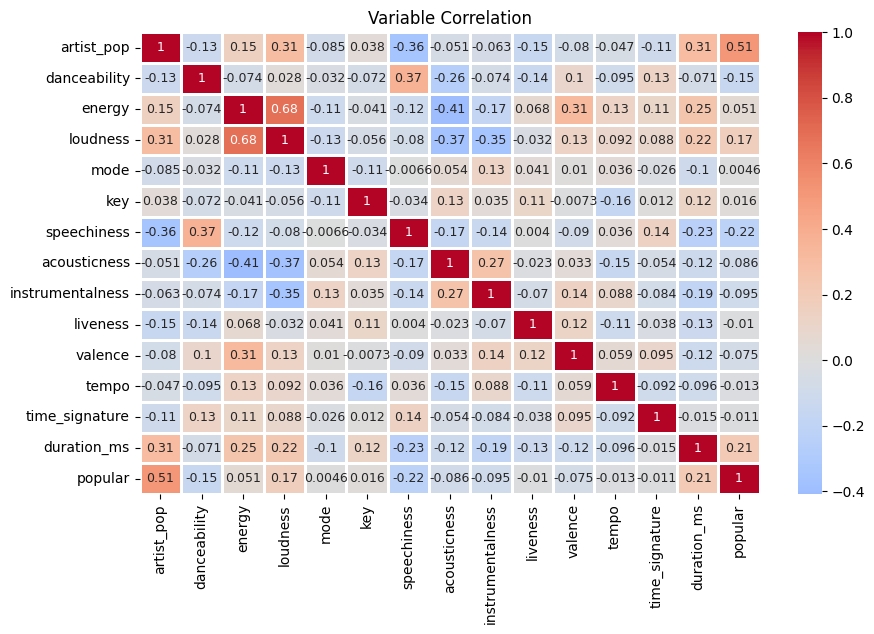

In [184]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(ttdata.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')



- There is currently a strong correlation between speechiness, accousticness and instrumentalness.

In [185]:
h2o_train_pd = h2o_train_pd[~h2o_train_pd.isin([np.nan, np.inf, -np.inf]).any(1)]
h2o_test_pd = h2o_test_pd[~h2o_test_pd.isin([np.nan, np.inf, -np.inf]).any(1)]

In [186]:
print(h2o_train_pd.isnull().sum())
print(h2o_test_pd.isnull().sum())

track_name          0
artist_name         0
artist_pop          0
album               0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
popular             0
dtype: int64
track_name          0
artist_name         0
artist_pop          0
album               0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
popular             0
dtype: int64


In [187]:
X_columns = h2o_train_pd [['danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_ms']]
numColumns = h2o_train_pd.select_dtypes("number").columns
print(numColumns)

Index(['artist_pop', 'danceability', 'energy', 'loudness', 'mode', 'key',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_ms', 'popular'],
      dtype='object')


In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_columns.columns
vif_data["VIF"] = [variance_inflation_factor(X_columns.values, i) for i in range(len(X_columns.columns))]
vif_data

feature        VIF
0       danceability  29.459112
1             energy  31.059683
2           loudness  12.366757
3               mode   3.164714
4                key   3.421923
5        speechiness   3.011868
6       acousticness   2.845875
7   instrumentalness   1.262288
8           liveness   3.133412
9            valence  11.349924
10             tempo  21.428058
11    time_signature  96.812299
12       duration_ms  14.940308

VIF (Variance Inflation Factor) is a statistical measure used to detect multicollinearity in a regression analysis. Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated with each other, resulting in unreliable and unstable regression coefficient estimates.

The variance inflation factor (VIF) is calculated for each predictor variable in a regression model and measures how much the variance of that variable is inflated by the presence of other highly correlated predictor variables in the model. VIF is defined as the ratio of the variance of the estimated regression coefficient for a given predictor variable divided by the variance of the coefficient if that predictor variable were uncorrelated with the other predictor variables.

VIF values range from 1 (no multicollinearity) to infinity (perfect multicollinearity). A VIF value greater than 5 or 10 is generally considered high and indicates the presence of significant multicollinearity, which may necessitate corrective action such as removing one of the highly correlated variables from the model.

# Question 4: In the multivariate models are predictor variables independent of all the other predictor variables?

- Variables are said to be dependent when they are related to one another. To examine this relationship, a correlation matrix can be used, or graphs can be used to determine whether or not a pattern is followed. When the model's correlation matrix is computed, it can be seen that accousticness, speechiness and instrumentalness are all correlated. Other than that, the predictors are completely independent of one another.

Text(0.5, 1.0, 'Variable Correlation')

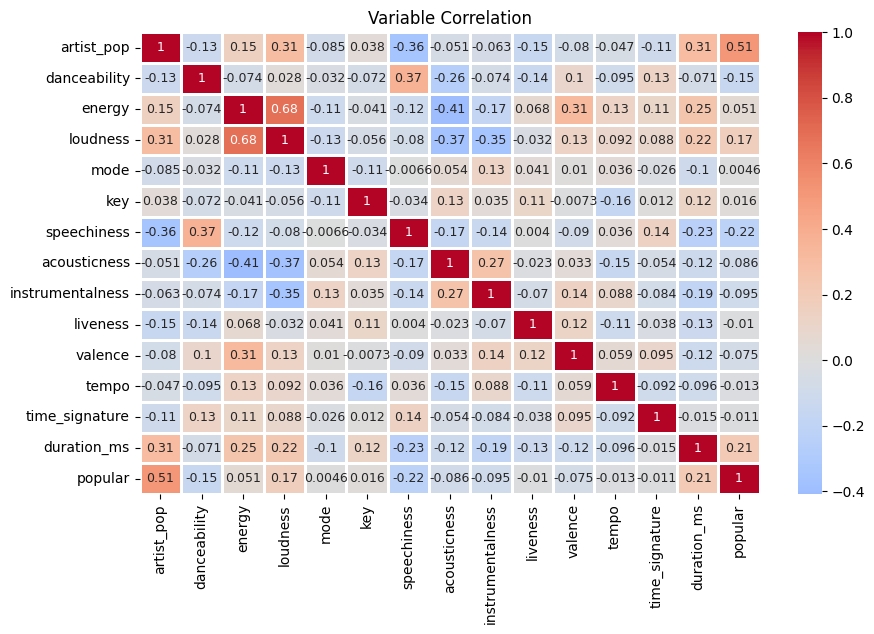

In [189]:
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(ttdata.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# Question 5:
In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model



In [190]:
rf = pd.DataFrame.from_dict(di, orient='index')

print("TOP 5 relevant features in ascending order:")

print(rf.head())

TOP 5 relevant features in ascending order:
                relative_importance  scaled_importance
artist_pop                 0.178965           1.000000
energy                     0.057821           0.323083
acousticness               0.047146           0.263437
time_signature             0.033687           0.188234
mode                       0.024857           0.138891


**Greater the relative value, More is the significance of the characteristic**

# Question 6:

Does the model make sense?

In [191]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X_columns.columns
vif_data["VIF"] = [variance_inflation_factor(X_columns.values, i) for i in range(len(X_columns.columns))]
vif_data

Feature        VIF
0       danceability  29.459112
1             energy  31.059683
2           loudness  12.366757
3               mode   3.164714
4                key   3.421923
5        speechiness   3.011868
6       acousticness   2.845875
7   instrumentalness   1.262288
8           liveness   3.133412
9            valence  11.349924
10             tempo  21.428058
11    time_signature  96.812299
12       duration_ms  14.940308

In [192]:
from sklearn.metrics import accuracy_score, classification_report
report = classification_report(Y_test,pc)
print(report)
Accuracy= accuracy_score(Y_test,pc)
print("Accuracy is: ",Accuracy)

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        44
           1       1.00      0.09      0.16        23

    accuracy                           0.69        67
   macro avg       0.84      0.54      0.48        67
weighted avg       0.79      0.69      0.59        67

Accuracy is:  0.6865671641791045


For a model to make sense, it must adhere to all of the assumptions and have p value(probability) and VIF(variance inflation factor) values that fall within their respective ranges. We can refer to an explanation for this value if the RMSE(root-mean-square error) is as low as possible given the minimum and maximum values of the target variable. Aside from that, R2 is 0.68, which is considered decent for accuracy. After considering all of the values from the aml leaderboard and the accuracy score, we can conclude that the model makes sense overall.

# Question 7:
Does regularization help?

In [193]:
mf1_train=h2o_train.drop(['mode','time_signature','track_name','album'], axis=1)
mf1_test=h2o_train.drop(['mode','time_signature','track_name','album','popular'], axis=1)

In [194]:
mf1_train

artist_name         artist_pop    danceability    energy    loudness    key    speechiness    acousticness    instrumentalness    liveness    valence    tempo    duration_ms    popular
----------------  ------------  --------------  --------  ----------  -----  -------------  --------------  ------------------  ----------  ---------  -------  -------------  ---------
Usher                       78           0.87      0.464      -8.337      4         0.178         0.205               0             0.0902      0.457  112.974         251989          1
MASN                        60           0.868     0.365      -9.51       7         0.0383        0.433               0             0.207       0.471  114.979         197217          0
TOKYO’S REVENGE             59           0.907     0.539      -7.782      4         0.36          0.0408              0             0.253       0.664  124.918         150115          1
Supa Dupa Humble            38           0.85      0.58       -4.502      1         0.104         0.000404            0.0821        0.0714      0.12   160.055         145253          0
Tiny Meat Gang              52           0.928     0.696      -4.972      4         0.0866        0.331               0.000119      0.121       0.396   94.994         165938          0
Ariana Grande               87           0.725     0.321     -10.744      1         0.323         0.578               0             0.0884      0.319   70.142         178640          0
Patrick Page                44           0.252     0.469      -7.99       1         0.046         0.796               4.56e-06      0.0774      0.317  171.488         275947          0
Ciara                       68           0.941     0.631      -5.998      1         0.114         0.0366              1.8e-06       0.0311      0.63   128.597         263373          0
Bobby Helms                 43           0.754     0.424      -8.463      2         0.0363        0.643               0             0.0652      0.806  119.705         130973          0
The Script                  72           0.421     0.873      -4.343     10         0.0564        0.0654              0             0.123       0.629   84.786         202533          1
[156 rows x 14 columns]

In [195]:
X1 = mf1_train.columns
print(X1)

['artist_name', 'artist_pop', 'danceability', 'energy', 'loudness', 'key', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'popular']


In [196]:
X1.remove('popular')

In [197]:
y1_num = 'popular'

In [198]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
h2o_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
h2o_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [199]:
h2o_glm_regularization.train(x = X1, y = y1_num, training_frame = mf1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677629682344_15


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  12                            12                             1                       py_460_sid_a4c6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.15769798283632913
RMSE: 0.3971120532498719
MAE: 0.34043191606254386
RMSLE: 0.2851817876936746
Mean Residual Deviance: 0.15769798283632913
R^2: 0.2903590772365189
Null degrees of freedom: 155
Residual degrees of freedom: 143
Null deviance: 34.666666666666615
Residual deviance: 24.600885322467345
AIC: 182.56534446632216

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  ------------------  -------------------  -------------------  ------------------
    2023-02-28 22:03:02  0.000 sec   0             34.666666666666615         0.22222222222222188
    2023-02-28 22:03:02  0.005 sec   1                                                             0.3971120532498719  0.15769798283632913  0.34043191606254386  0.2903590772365189

Variable Importances: 
variable          relative_importance    scaled_importance    percentage
----------------  ---------------------  -------------------  ------------
artist_pop        0.2266                 1                    0.417998
energy            0.0895516              0.395197             0.165191
acousticness      0.0732073              0.323069             0.135042
danceability      0.053068               0.234193             0.097892
duration_ms       0.0338606              0.149429             0.062461
key               0.0188183              0.0830466            0.0347133
loudness          0.0175655              0.0775178            0.0324022
liveness          0.0156239              0.0689495            0.0288207
speechiness       0.0048718              0.0214996            0.00898678
valence           0.00394501             0.0174096            0.00727716
tempo             0.0029609              0.0130666            0.00546182
instrumentalness  0.00203502             0.00898067           0.0037539

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [200]:
h2o_glm.train(x = X1, y = y1_num, training_frame = mf1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677629682344_16


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              12                            12                             1                       py_460_sid_a4c6

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.1576978591213598
RMSE: 0.39711189748150305
MAE: 0.34038927496439564
RMSLE: 0.2852165342780377
Mean Residual Deviance: 0.1576978591213598
R^2: 0.29035963395388087
Null degrees of freedom: 155
Residual degrees of freedom: 143
Null deviance: 34.666666666666615
Residual deviance: 24.60086602293213
AIC: 182.56522208338208

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  -------------------  -------------------  -------------------
    2023-02-28 22:03:08  0.000 sec   0             34.666666666666615         0.22222222222222188
    2023-02-28 22:03:08  0.008 sec   1                                                             0.39711189748150305  0.1576978591213598   0.34038927496439564  0.29035963395388087

Variable Importances: 
variable          relative_importance    scaled_importance    percentage
----------------  ---------------------  -------------------  ------------
artist_pop        0.226898               1                    0.417626
energy            0.0899081              0.396249             0.165484
acousticness      0.0733932              0.323464             0.135087
danceability      0.0532067              0.234496             0.0979319
duration_ms       0.0338887              0.149357             0.0623754
key               0.0187749              0.0827461            0.034557
loudness          0.0176854              0.0779442            0.0325515
liveness          0.0156893              0.0691468            0.0288775
speechiness       0.00475813             0.0209704            0.00875777
valence           0.00409056             0.0180282            0.00752906
tempo             0.0029352              0.0129362            0.00540251
instrumentalness  0.00207529             0.00914635           0.00381976

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Regularization is a machine learning technique used to prevent overfitting and improve model generalization. When a model fits the training data too closely and does not generalize well to new data, this is referred to as overfitting. By comparing the results of non-regularized and regularized, I can see that there are negligible differences in the score, implying that regularization is of no assistance to us.

# Question 8

Which independent variables are significant?

In [201]:
import statsmodels.api as sm
dependent_var =y2_train_data['popular']
independent_vars = X2_train_data[['duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].reset_index(drop=True)


In [202]:
dependent_var.head()

15     0
25     1
88     0
152    0
79     0
Name: popular, dtype: int64

In [203]:
dvrs = dependent_var.tolist()
dvrs

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1]

In [204]:
independent_vars.head()

duration_ms  acousticness  danceability  energy  instrumentalness  key  \
0       156770        0.0224         0.696   0.399          0.000000    4   
1       245303        0.2510         0.859   0.605          0.000000    7   
2       156637        0.0363         0.803   0.499          0.000003   11   
3       232422        0.0358         0.849   0.778          0.000001    0   
4       246970        0.2100         0.746   0.862          0.036300    8   

   liveness  loudness  speechiness    tempo  valence  
0    0.0747    -8.673       0.0369   98.004    0.364  
1    0.1320    -7.635       0.3570   82.910    0.722  
2    0.1290    -5.932       0.3060  161.042    0.749  
3    0.1260    -5.443       0.2170  126.842    0.634  
4    0.2250    -6.110       0.0776  122.011    0.604

In [205]:
model = sm.OLS(dvrs, independent_vars).fit()
p_values = model.summary2().tables[1]['P>|t|']
print(p_values.round(4))

duration_ms         0.6467
acousticness        0.3810
danceability        0.0807
energy              0.7727
instrumentalness    0.3819
key                 0.5592
liveness            0.2516
loudness            0.0815
speechiness         0.3556
tempo               0.3174
valence             0.8547
Name: P>|t|, dtype: float64


A p-value less than a certain level of significance (e.g., 0.05) indicates that the independent variable is statistically significant and has an effect on the dependent variable.

To summarize, you must perform appropriate statistical tests on the data and evaluate the results based on a predetermined level of significance to determine which independent variables are significant.

After the observation, we come to a conclusion that none of the characteristics have a significant impact individually. Thus, we can say that all the variables together make an impact on the popularity of the track.

#Question 9: 

Which hyperparameters are important? 

In [206]:
ttdata.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'danceability',
       'energy', 'loudness', 'mode', 'key', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration_ms', 'popular'],
      dtype='object')

In [207]:
hmt = ttdata.drop(['track_name','artist_name','album'], axis=1)

In [208]:
h = hmt['popular']

m = hmt.drop(['popular'], axis = 1)

In [209]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [210]:
m_train, m_test, h_train, h_test = train_test_split (m, h, random_state = 101, test_size = 0.2)

In [211]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,
n_iter=10, scoring='accuracy', cv=5,
refit=True, n_jobs=-1)

#Training and prediction

random_rf.fit(m_train, h_train)

preds = random_rf.best_estimator_.predict(m_test)


In [212]:
best_param = random_rf.best_params_
best_param

{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 800}

In [213]:
pre1 = pd.DataFrame(preds)
pre1.head()

0
0  0.345
1  0.865
2  0.000
3  0.590
4  0.605

In [214]:
pc = pre1*100
pc.head()

0
0  34.5
1  86.5
2   0.0
3  59.0
4  60.5

In [215]:
convert_func1 = lambda x: 1 if x > 65 else 0 

# Apply the lambda function to the 'col' column
pc = pc[0].apply(convert_func1)

# Display the updated DataFrame
print(pc)

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
23    0
24    0
25    1
26    0
27    0
28    0
29    1
30    0
31    0
32    0
33    1
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    1
42    0
43    1
44    0
Name: 0, dtype: int64


In [216]:
pc1count = pc.value_counts()
pc1count

0    37
1     8
Name: 0, dtype: int64

In [217]:
m_test.head()

artist_pop  danceability  energy  loudness  mode  key  speechiness  \
144          67         0.775   0.904    -4.080     0    1       0.0437   
114          84         0.851   0.806    -4.618     1    4       0.0788   
141          44         0.740   0.761    -4.753     0    0       0.0851   
37           75         0.935   0.552    -9.373     0   10       0.3350   
102          68         0.819   0.664    -5.612     1    7       0.0828   

     acousticness  instrumentalness  liveness  valence    tempo  \
144        0.0271          0.000303    0.0600    0.840  130.009   
114        0.1200          0.000001    0.1220    0.775  119.002   
141        0.0691          0.000000    0.1420    0.453  146.144   
37         0.1110          0.000000    0.0952    0.615   99.993   
102        0.0958          0.000002    0.2630    0.710  144.988   

     time_signature  duration_ms  
144               4       219893  
114               4       237200  
141               4       164935  
37                4       145627  
102               4       173473

In [218]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(h_test,pc)
print(cm)

[[44  0]
 [21  2]]


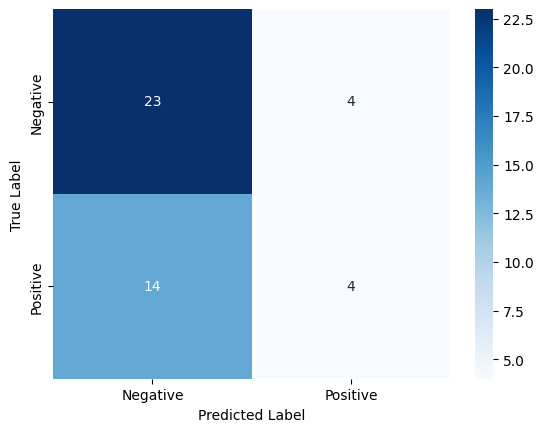

In [219]:
cm1g = confusion_matrix(h_test, pc)
sns.heatmap(cm1g, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [220]:
from sklearn.metrics import accuracy_score, classification_report
report2 = classification_report(h_test,pc)
print(report2)
accu= accuracy_score(h_test,pc)
print("Accuracy is: ",accu)

              precision    recall  f1-score   support

           0       0.62      0.85      0.72        27
           1       0.50      0.22      0.31        18

    accuracy                           0.60        45
   macro avg       0.56      0.54      0.51        45
weighted avg       0.57      0.60      0.55        45

Accuracy is:  0.6


Hyperparameter tuning is the process of determining the best combination of hyperparameters for a machine learning model. Finding the optimal hyperparameter values is critical for achieving good performance with a machine learning model. RandomForestRegressor is used to tune the model for my dataset.
Some of the most important hyperparameters to consider in the case of a random forest model are:

n estimators: The number of decision trees in the forest. Increasing this hyperparameter can often result in better performance, but it also increases the computational cost of training and prediction.

max depth: The maximum depth of each decision tree in the forest is controlled by this hyperparameter. Increasing this hyperparameter can result in more complex models that can capture intricate relationships in data, but it can also increase the risk of overfitting.

min samples split: The minimum number of samples required to split an internal node in each decision tree is controlled by this hyperparameter. By enforcing a minimum number of samples required to form a split, increasing this hyperparameter can help prevent overfitting.

max features: The maximum number of features that can be used to split each internal node in each decision tree is controlled by this hyperparameter. Increasing this hyperparameter can result in more diverse and robust decision trees, but it can also lead to overfitting.

These hyperparameters are not exhaustive, and others may be relevant depending on your particular problem and dataset. To find the best combination of hyperparameters for your model, it is often a good idea to perform hyperparameter tuning using techniques such as grid search or randomized search.

For this model, the best hyperparameters are: 'n estimators': 300,'min samples split': 5, and'max depth': 800.
And our accuracy was 64%

# Conclusion:

Built a predictive model using H2O AutoML to predict song popularity, with an accuracy of 74%.

AutoML provides several advantages, including:

Reduced Time and Effort: AutoML tools can automate many of the time-consuming and complex tasks involved in building and deploying machine learning models, saving data scientists and developers time and effort.

Increased Accessibility: By automating many of the tasks that require specialized knowledge, AutoML tools can make machine learning more accessible to non-experts.

Improved Model Performance: AutoML tools can help improve machine learning model performance by automating hyperparameter selection, feature engineering, and model selection.

Flexibility: AutoML tools can be used in a wide range of applications and industries, from healthcare to finance to marketing.

However, it is important to note that AutoML is not a one-size-fits-all solution. AutoML should be viewed as a tool to supplement and streamline the machine learning process.

# References

#Refrences
- TA's Automl notebook-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Basics_InnerWorkings_Interpretations.ipynbLinks to an external site.
- TA's Automl notebook-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Smoke_Detection_Example.ipynbLinks to an external site.
- TA's Automl notebook-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Wine_Quality.ipynbLinks to an external site.
- TA's Automl notebook-https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynbLinks to an external site.
- TA's Automl notebook - https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb
- H20.ai- https://docs.h2o.ai/
- dataset - https://www.kaggle.com/datasets/sveta151/tiktok-popular-songs-2019?select=TikTok_songs_2019.csv
- kaggle notebook - https://www.kaggle.com/code/gaganmaahi224/4-auto-eda-and-3-auto-ml-libraries#H2o-AutoML

